In [1]:
from Networks import *

Function Description:
1. plotRandomCommunity(G, community, title = None)
2. get_community_dict(communities)
3. get_communities(community_dict)
4. run_louvain(G)
5. metrics(ground_truth, predicted)
6. plot_metrics_sparse(G, ground_truth, sparseFunctions, k_values)

Sampling Methods:
1. edge_betweenness_sparsification(G, k)
2. edge_random_sparsification(G, k)
3. edge_jaccard_sparsification(G, k)
4. edge_L_Spar_sparsification(G, r)



ORIGINAL GRAPH: G_DBLP, INDUCED SUBGRAPH: G_ind_DBLP, COMMUNITIES: communitiesDBLP
Number of nodes:  317080
Number of edges:  1049866
Number of communities:  150
Number of nodes in induced subgraph:  1420
Number of edges in induced subgraph:  4609

ORIGINAL GRAPH: G_Amz, INDUCED SUBGRAPH: G_ind_Amz, COMMUNITIES: communitiesAmazon
Number of nodes:  334863
Number of edges:  925872
Number of communities:  300
Number of nodes in induced subgraph:  2008
Number of edges in induced subgraph:  5960

ORIGINAL GRAPH: G_YT, INDUCED SUBGRAPH: G_ind_YT, COMMUNITIES: comm

In [4]:
import random

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
def degree_based_edge_sampling(graph, sampling_ratio):
    """
    Perform Degree-based Edge Sampling on the input graph.

    Parameters:
        graph (networkx.Graph): The input graph.
        sampling_ratio (float): The percentage of edges to retain (between 0 and 1).

    Returns:
        networkx.Graph: The sampled graph.
    """
    sampled_graph = nx.Graph()
    total_edges = graph.number_of_edges()

    # Create a list of edges sorted by the product of their endpoint degrees
    edge_degrees = [(edge, graph.degree(edge[0]) * graph.degree(edge[1])) for edge in graph.edges()]
    edge_degrees.sort(key=lambda x: x[1], reverse=True)
    edges = np.zeros((total_edges, 2))
    for i, e in enumerate(edge_degrees):
        edges[i] = e[0]
    
    # Determine the number of edges to retain based on the sampling ratio
    num_edges_to_retain = int(total_edges * sampling_ratio)

    # Sample the edges based on their degrees
    sorted_edge_prob = np.zeros(total_edges)
    for idx, edge_info in enumerate(edge_degrees):
        sorted_edge_prob[idx] = edge_info[1]
    sorted_edge_prob = sorted_edge_prob/np.sum(sorted_edge_prob)
    sampled_edges = np.random.choice(np.arange(total_edges), p = sorted_edge_prob, size = num_edges_to_retain, replace=False)

    # Add the sampled edges and original nodes to the sampled graph
    sampled_edges = edges[sampled_edges]
    sampled_graph.add_edges_from(sampled_edges)
    sampled_graph.add_nodes_from(graph.nodes)

    return sampled_graph

In [3]:
def spanning_tree_sampling(graph, sampling_ratio):
    """
    Perform Spanning Tree Sampling on the input graph.

    Parameters:
        graph (networkx.Graph): The input graph.
        sampling_ratio (float): The percentage of edges to retain (between 0 and 1).

    Returns:
        networkx.Graph: The sampled graph.
    """
    # Construct a minimum spanning tree of the original graph
    spanning_tree = nx.minimum_spanning_tree(graph)

    # Convert the spanning tree to a graph
    sampled_graph = nx.Graph(spanning_tree.edges())

    # Get the total number of edges in the original graph
    total_edges = graph.number_of_edges()

    # Calculate the number of edges to retain based on the sampling ratio
    num_edges_to_retain = int(total_edges * sampling_ratio)

    # If the spanning tree has fewer edges than the required number of retained edges,
    # randomly sample additional edges from the original graph to meet the quota
    if sampled_graph.number_of_edges() < num_edges_to_retain:
        remaining_edges = num_edges_to_retain - sampled_graph.number_of_edges()
        remaining_edges_to_sample = random.sample(list(graph.edges()), remaining_edges)
        sampled_graph.add_edges_from(remaining_edges_to_sample)

    return sampled_graph

In [5]:
k_values = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
sparseFunctions = [("Edge Betweenness", edge_betweenness_sparsification), ("Random", edge_random_sparsification), ("Edge Jaccard JC", edge_jaccard_sparsification), (r"$^*$Edge Local Search L-Spar", edge_L_Spar_sparsification), ("Degree Based Edge Sampling", degree_based_edge_sampling), ("Spanning Tree Sampling", spanning_tree_sampling)]

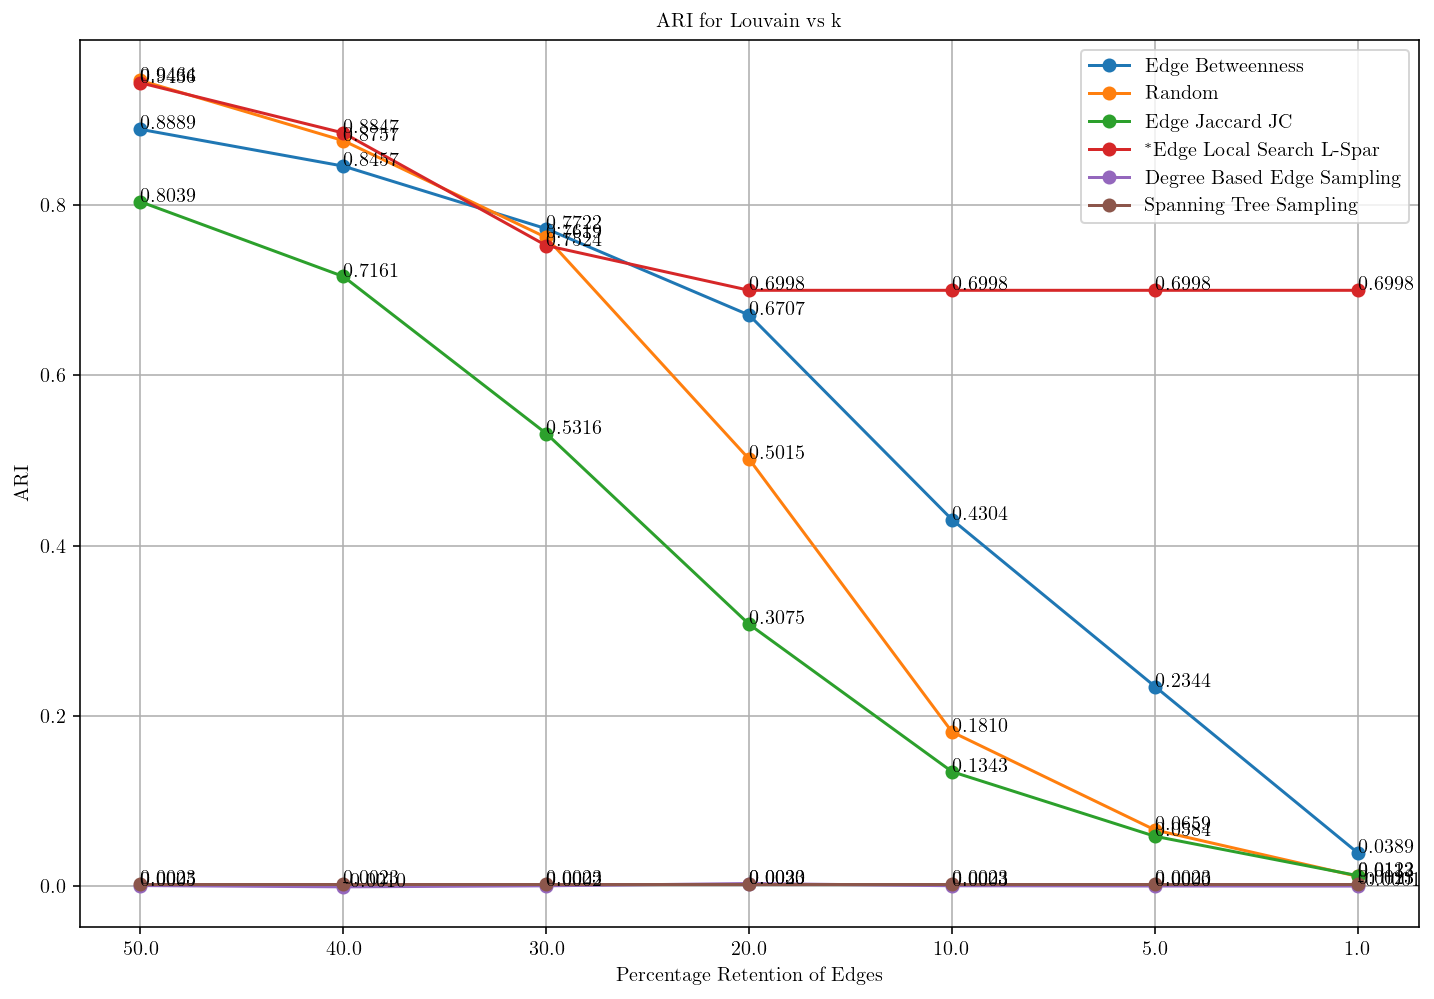

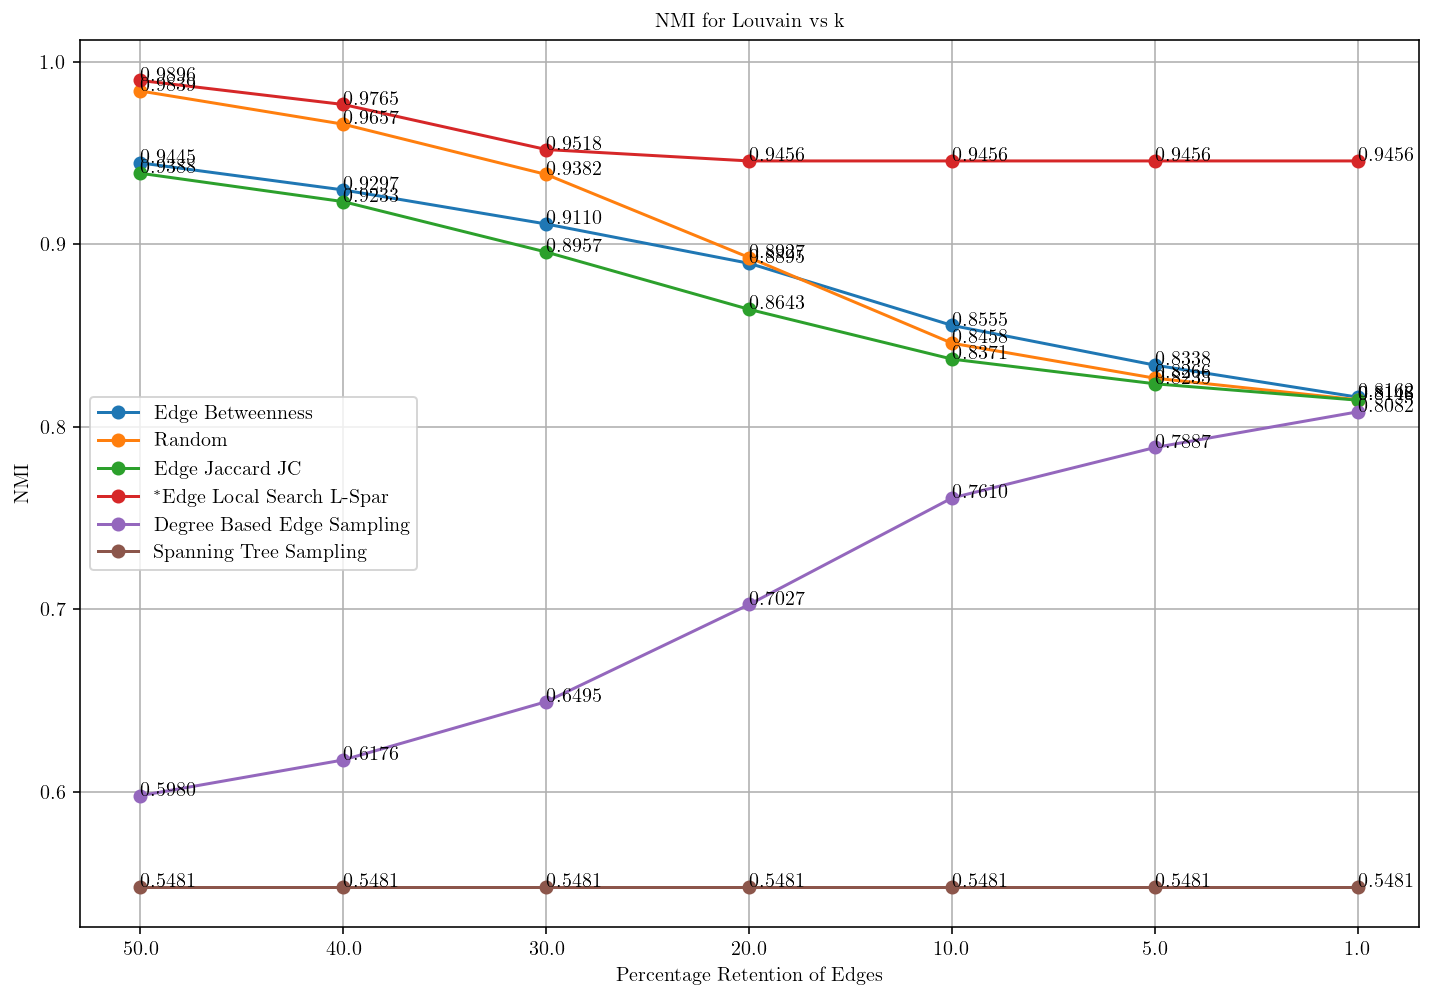

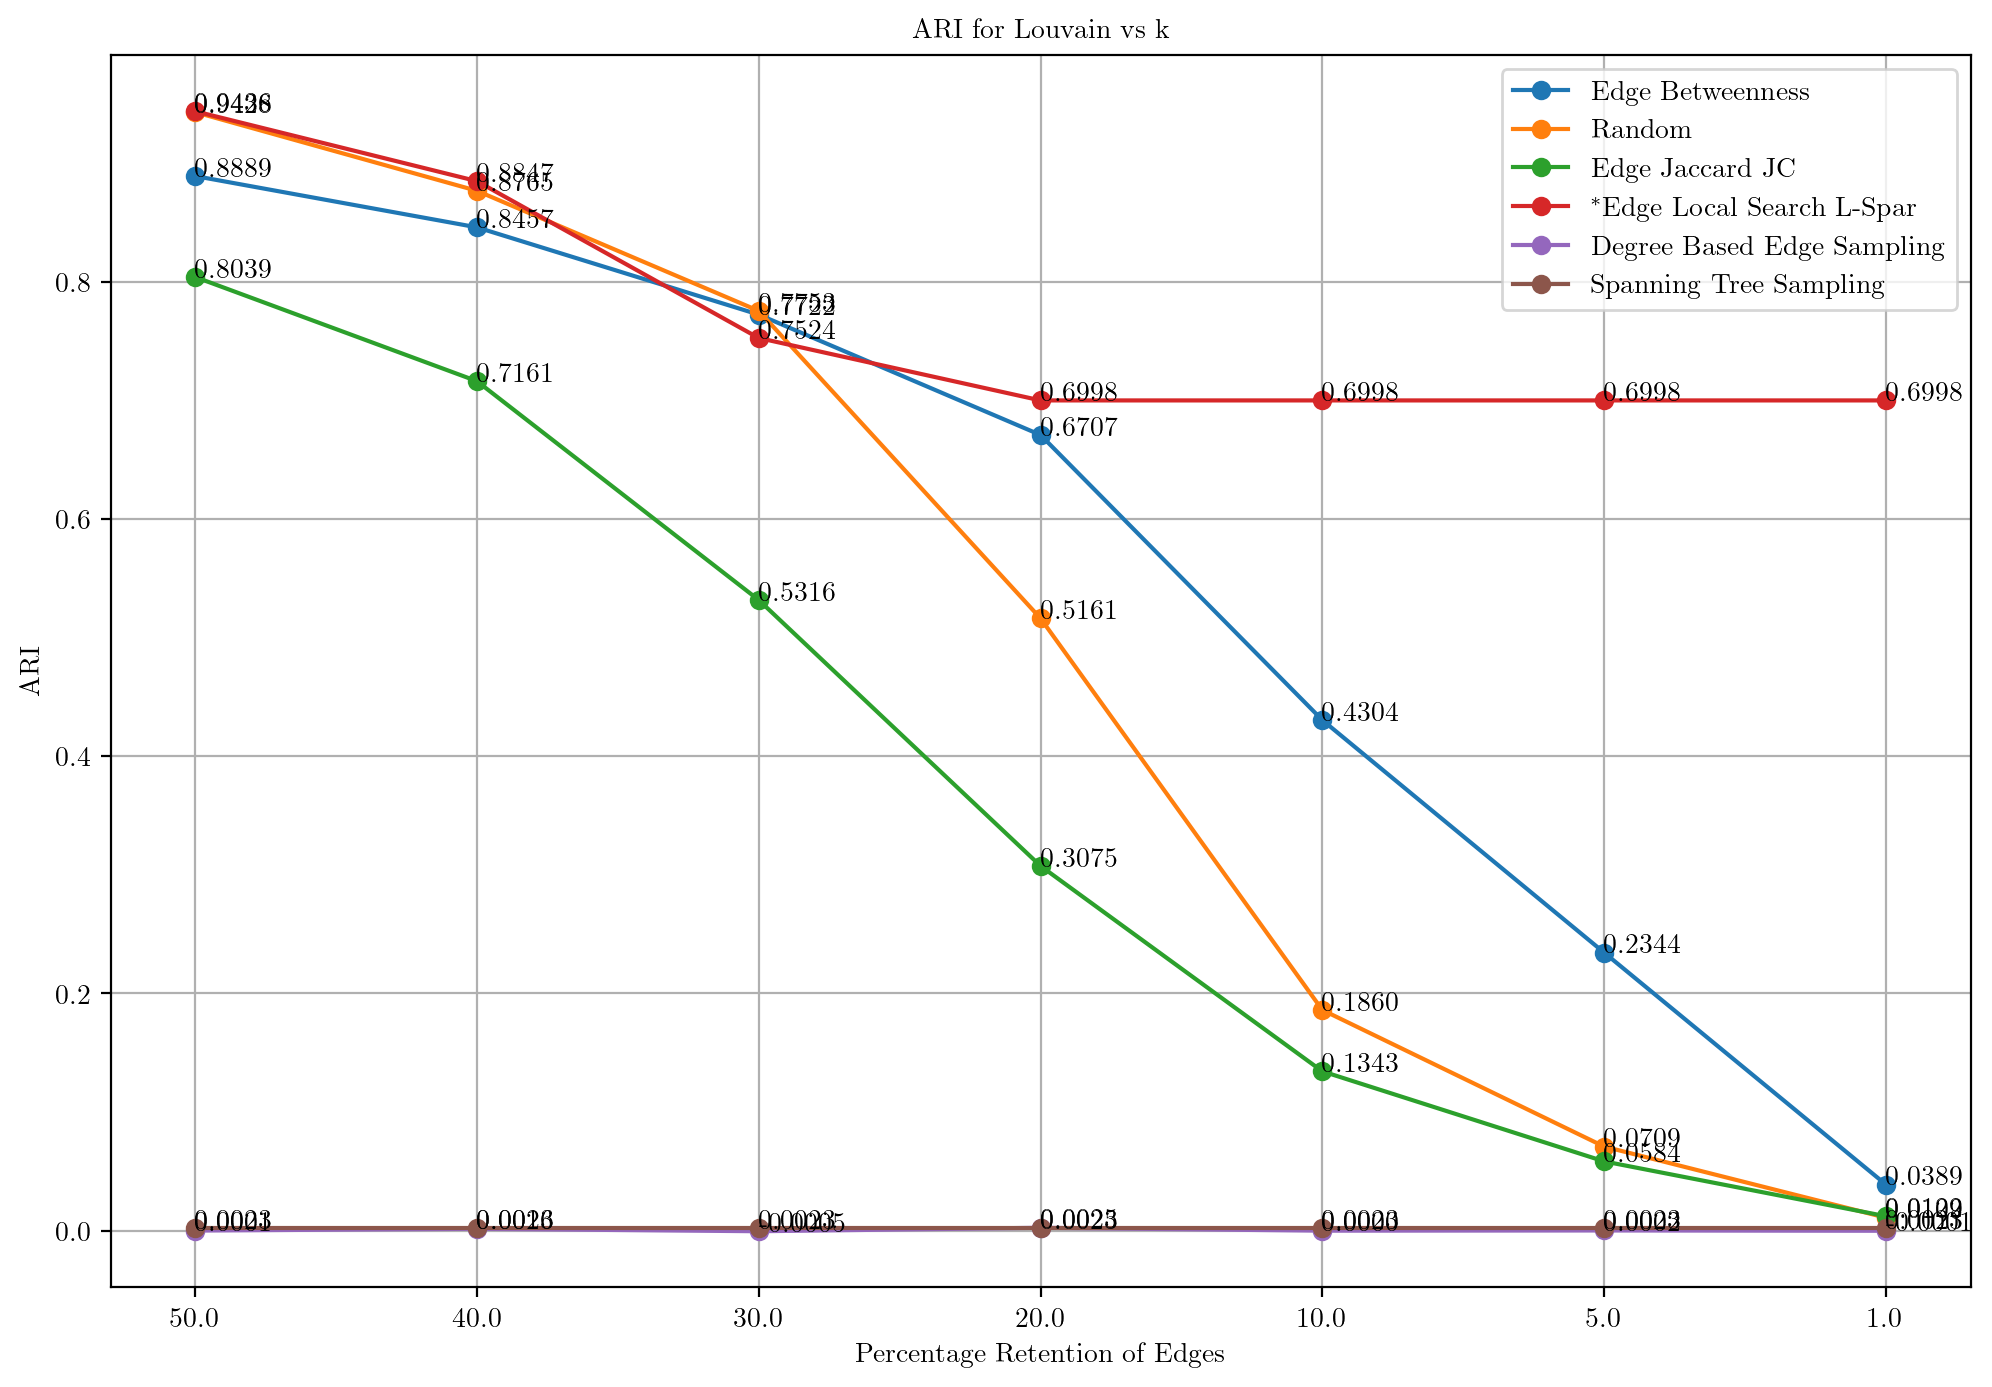

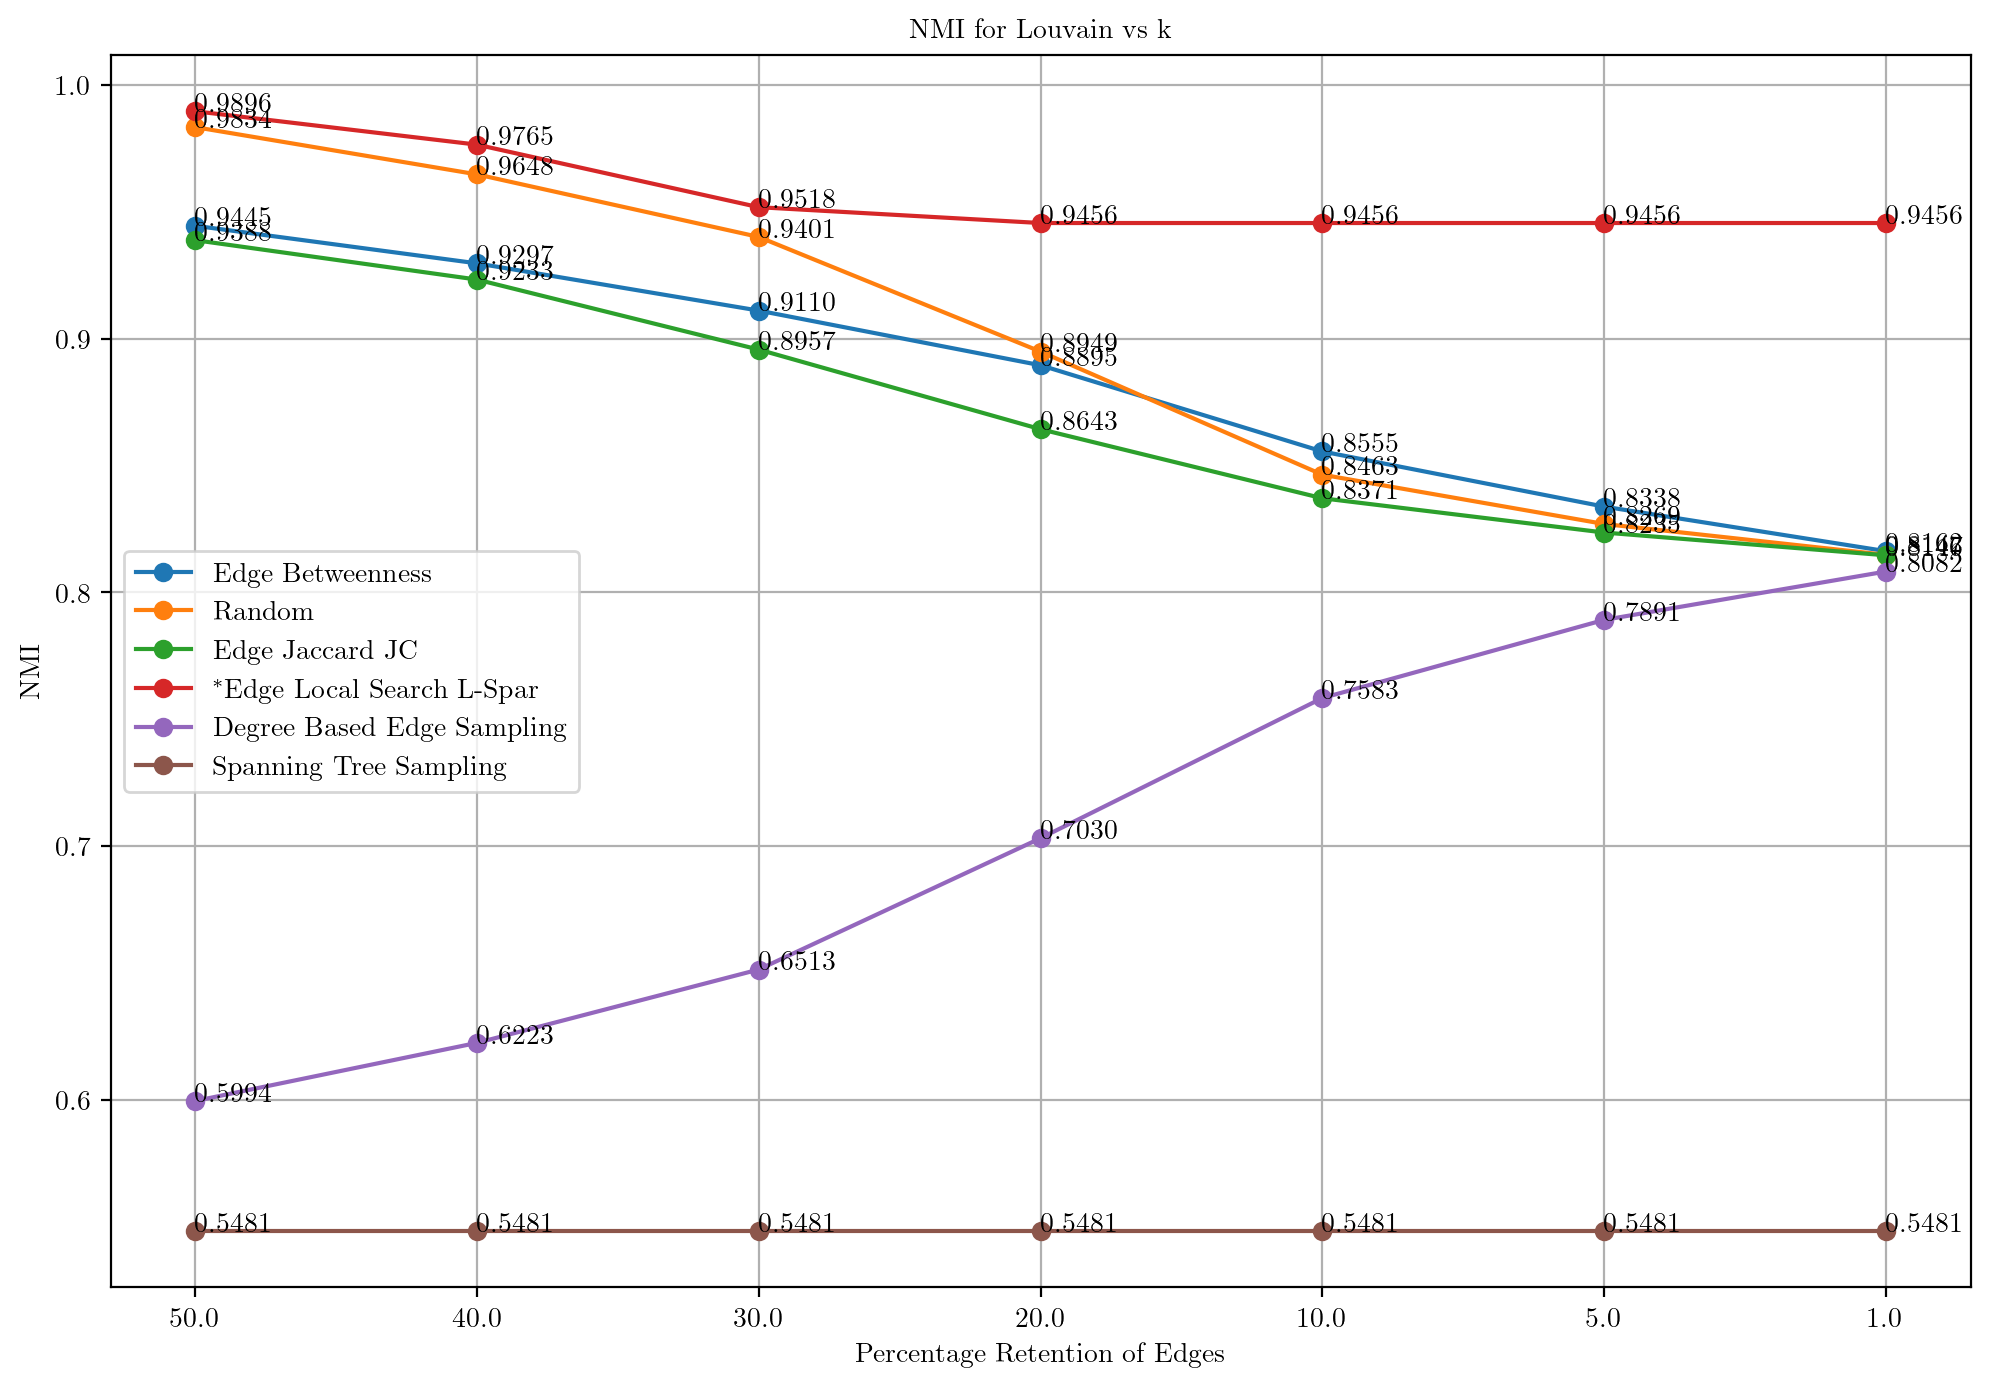

In [8]:
sparseAmzGraphs = plot_metrics_sparse(G_ind_Amz, run_louvain(G_ind_Amz), sparseFunctions, k_values)

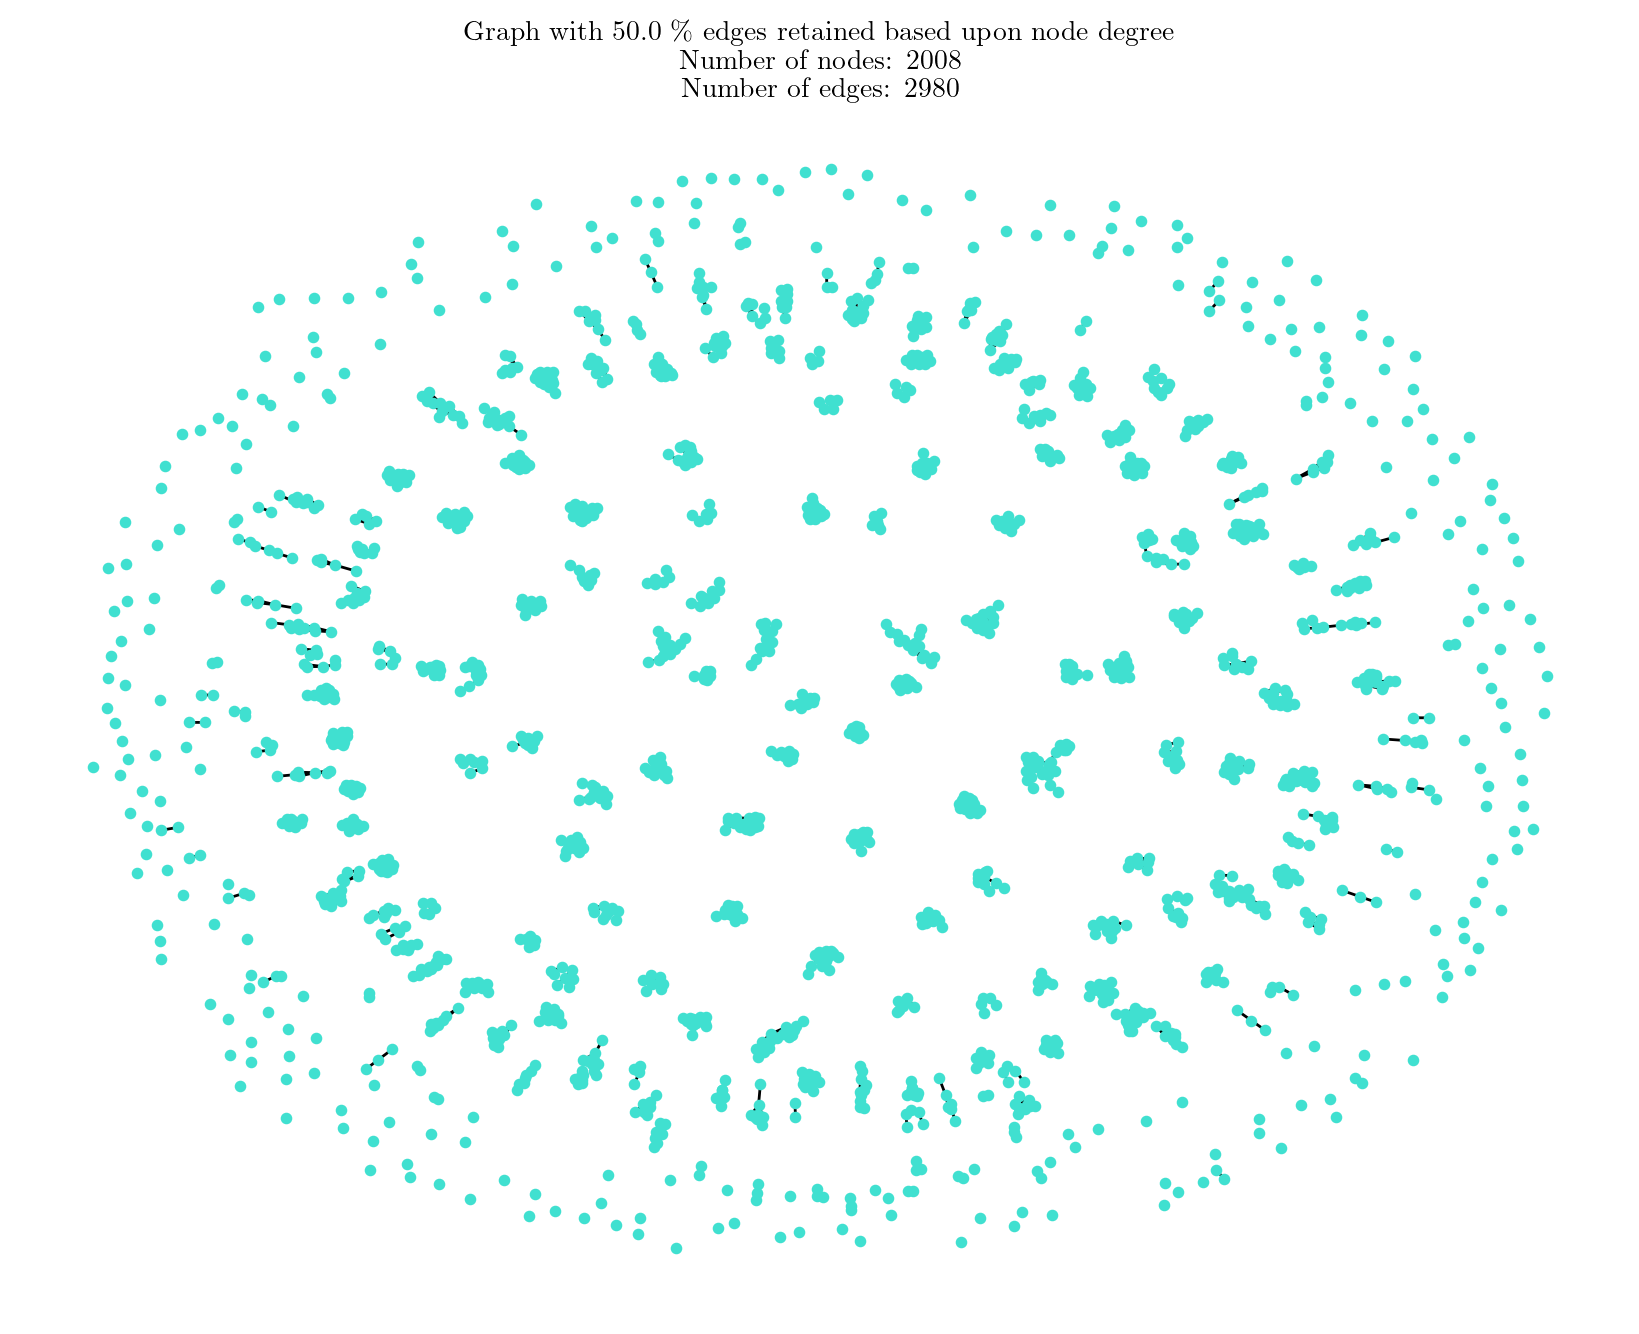

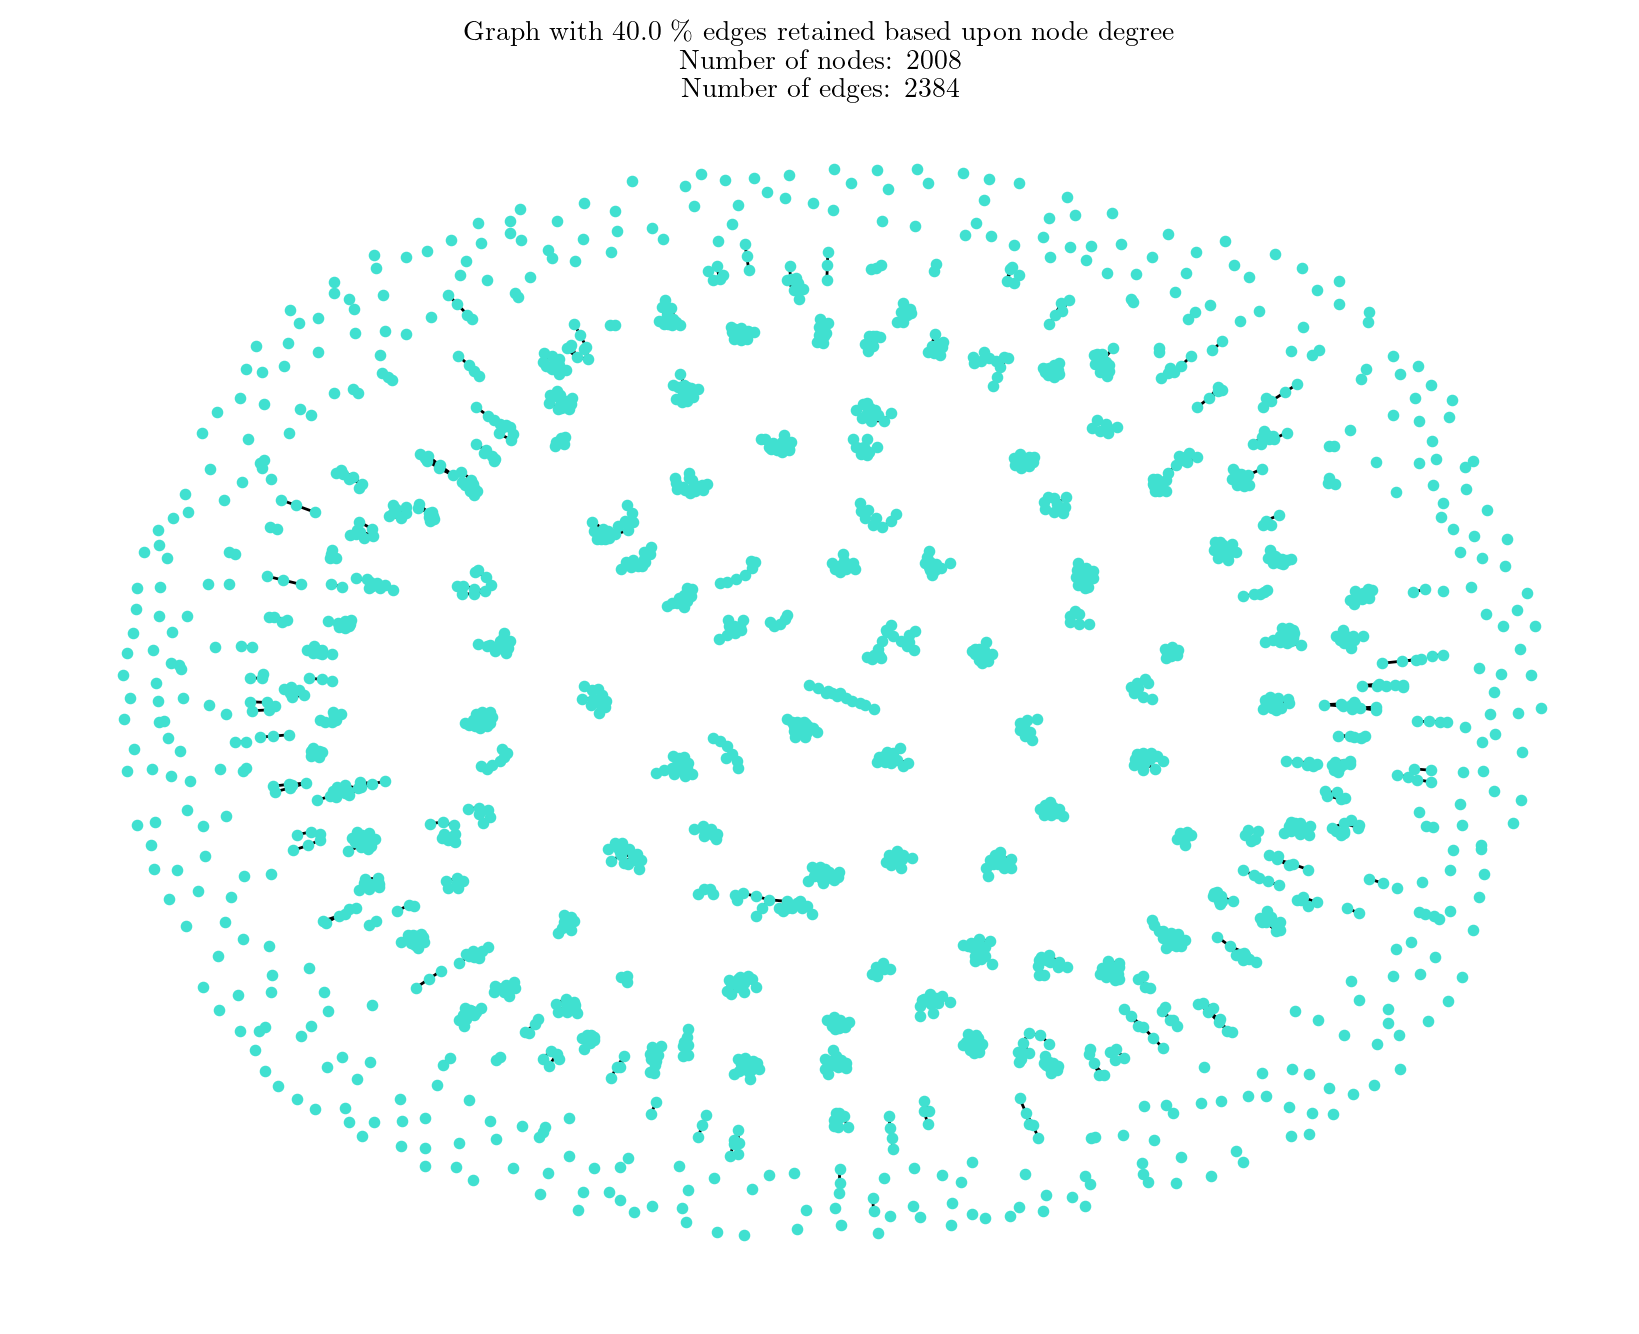

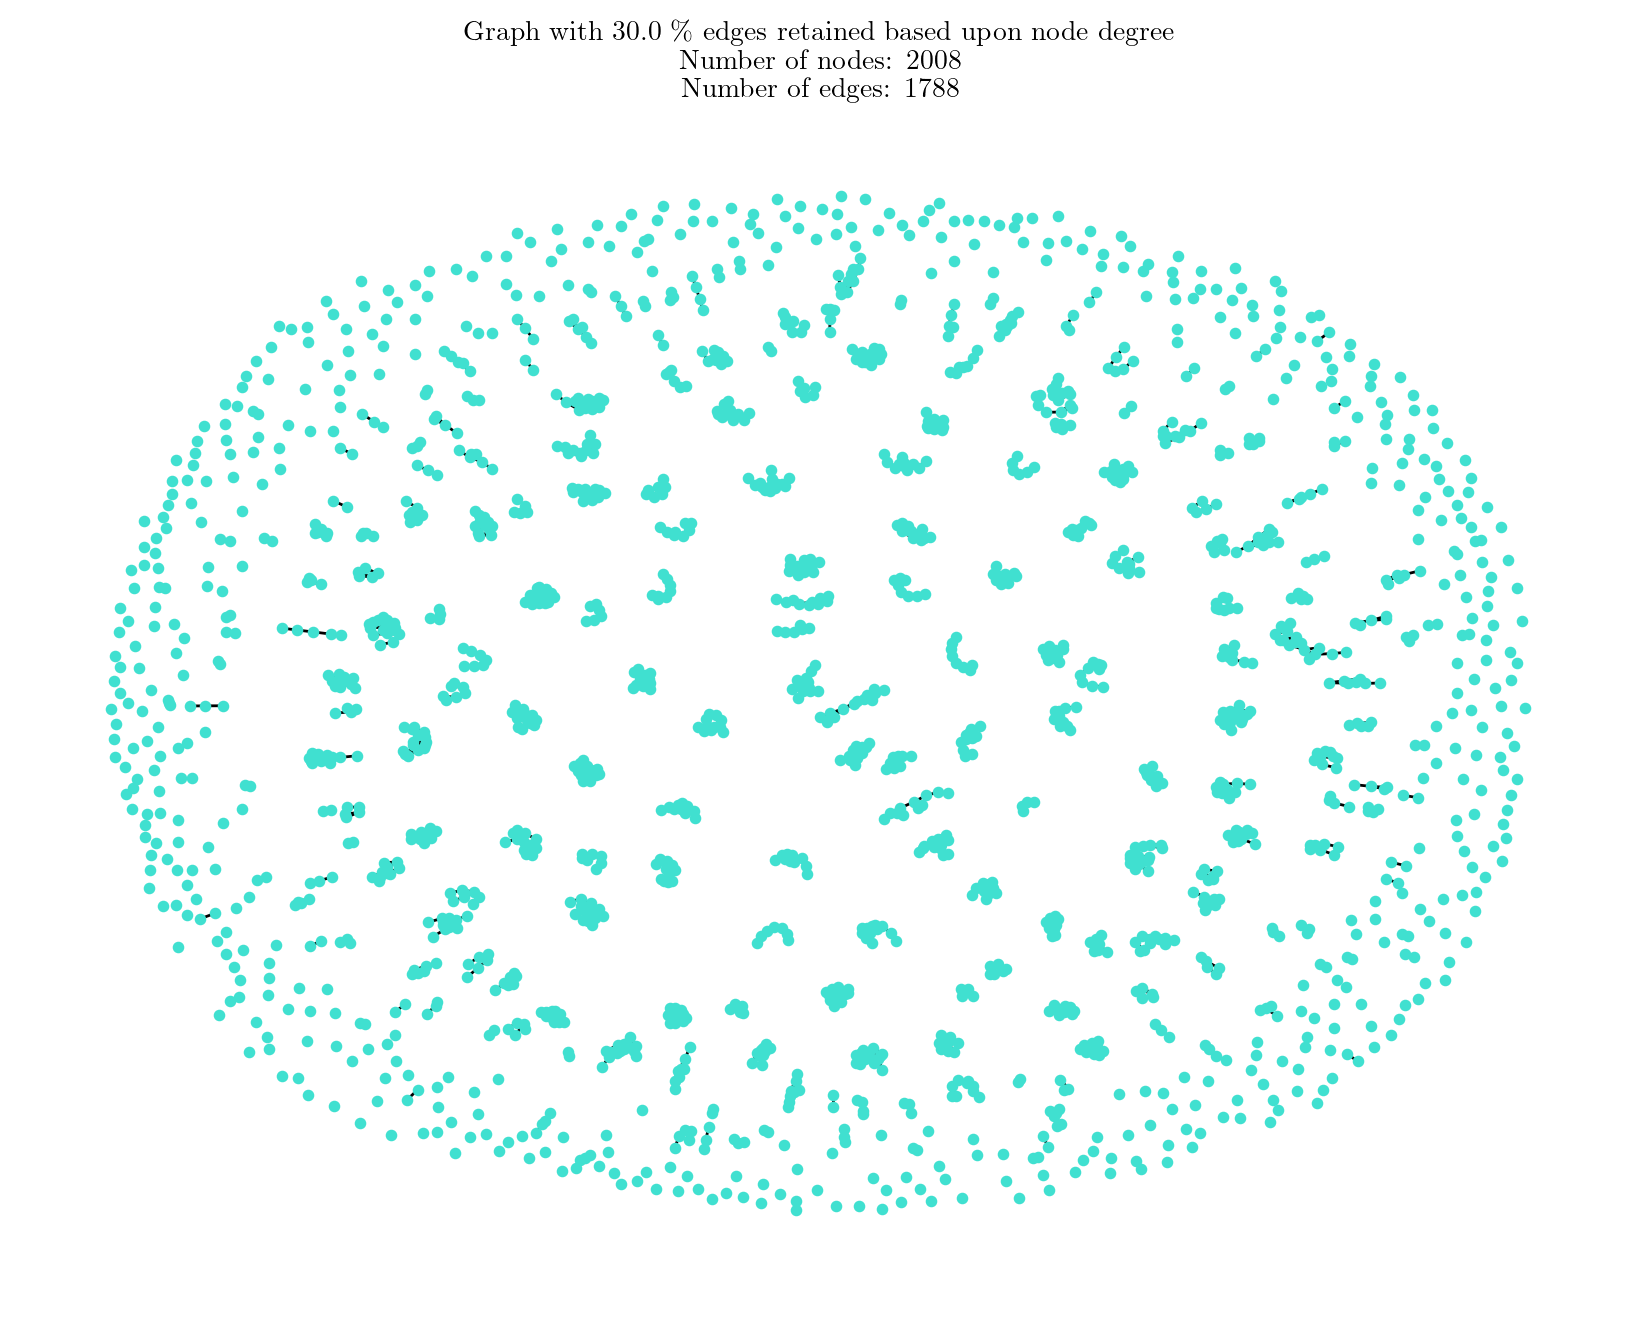

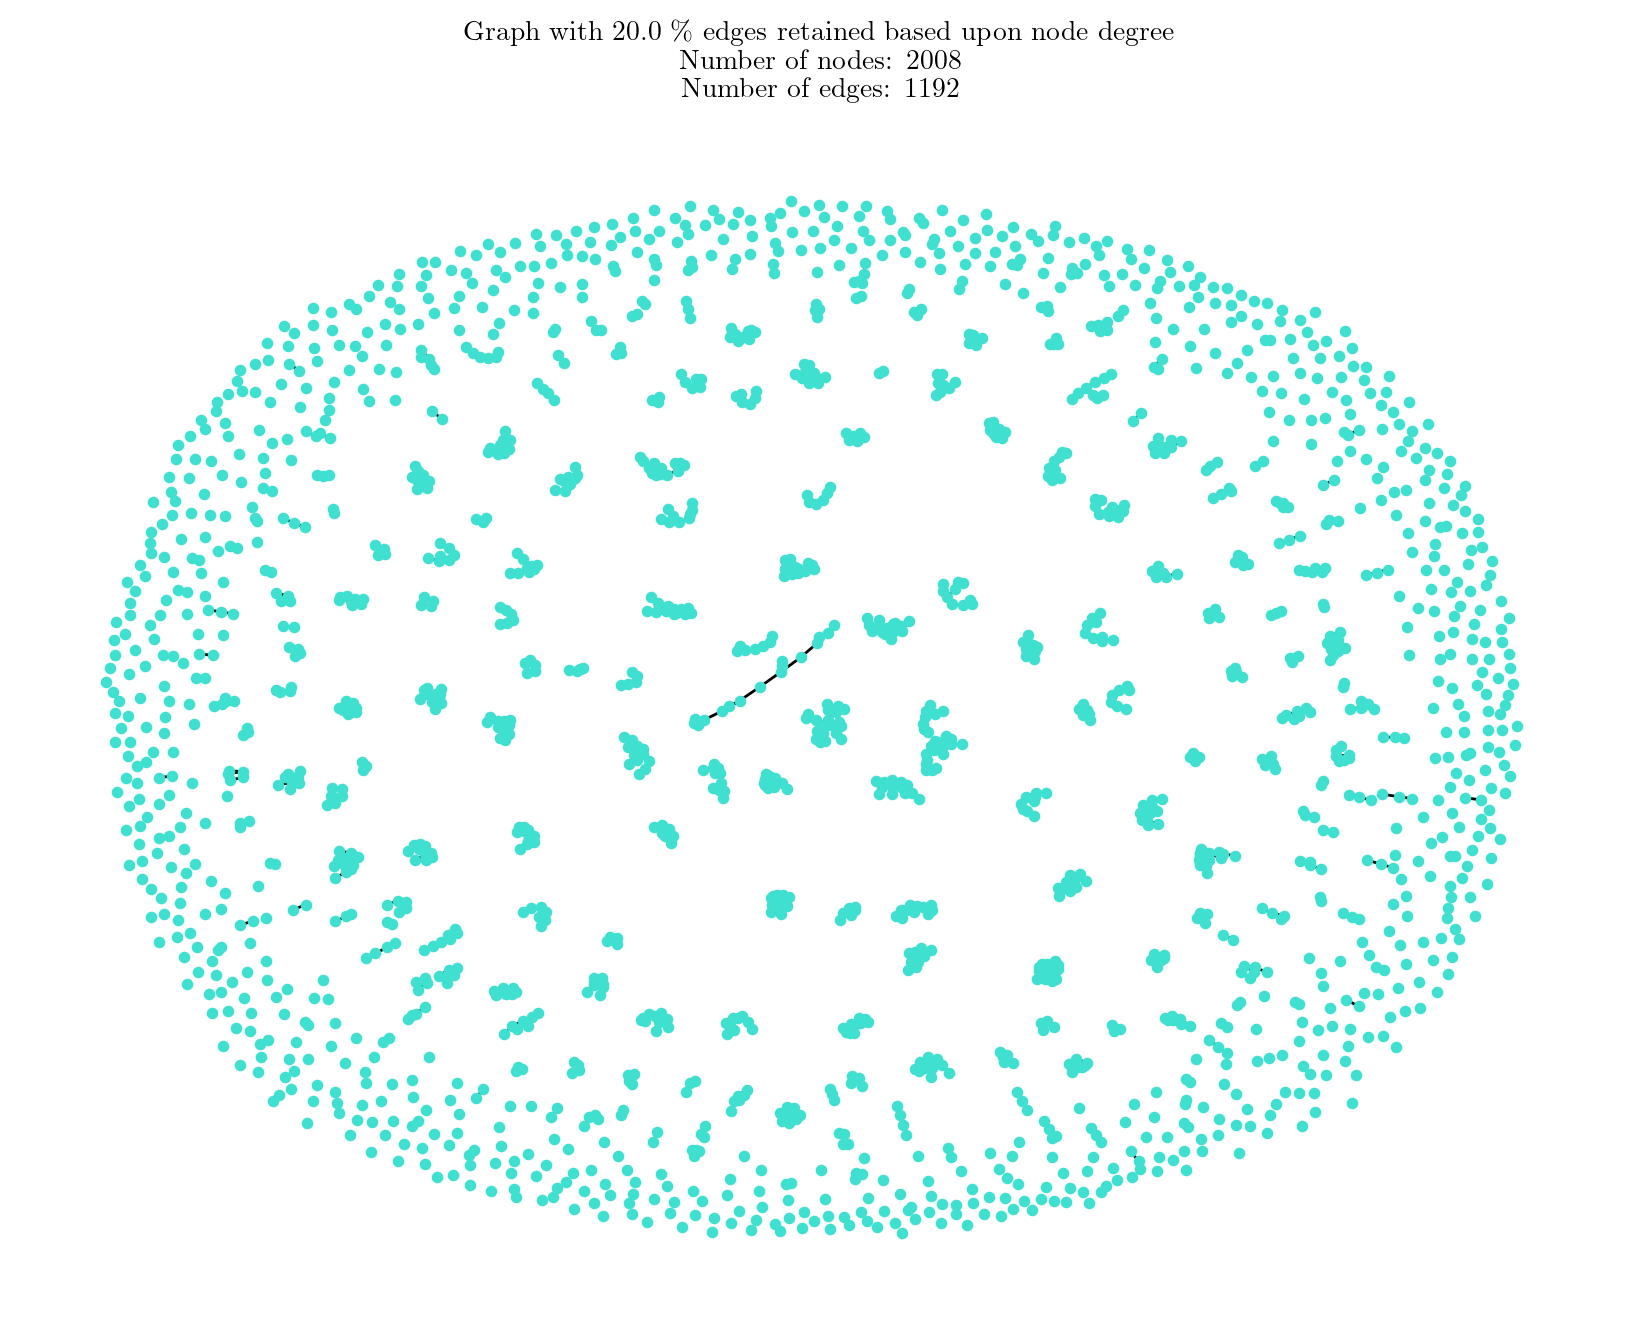

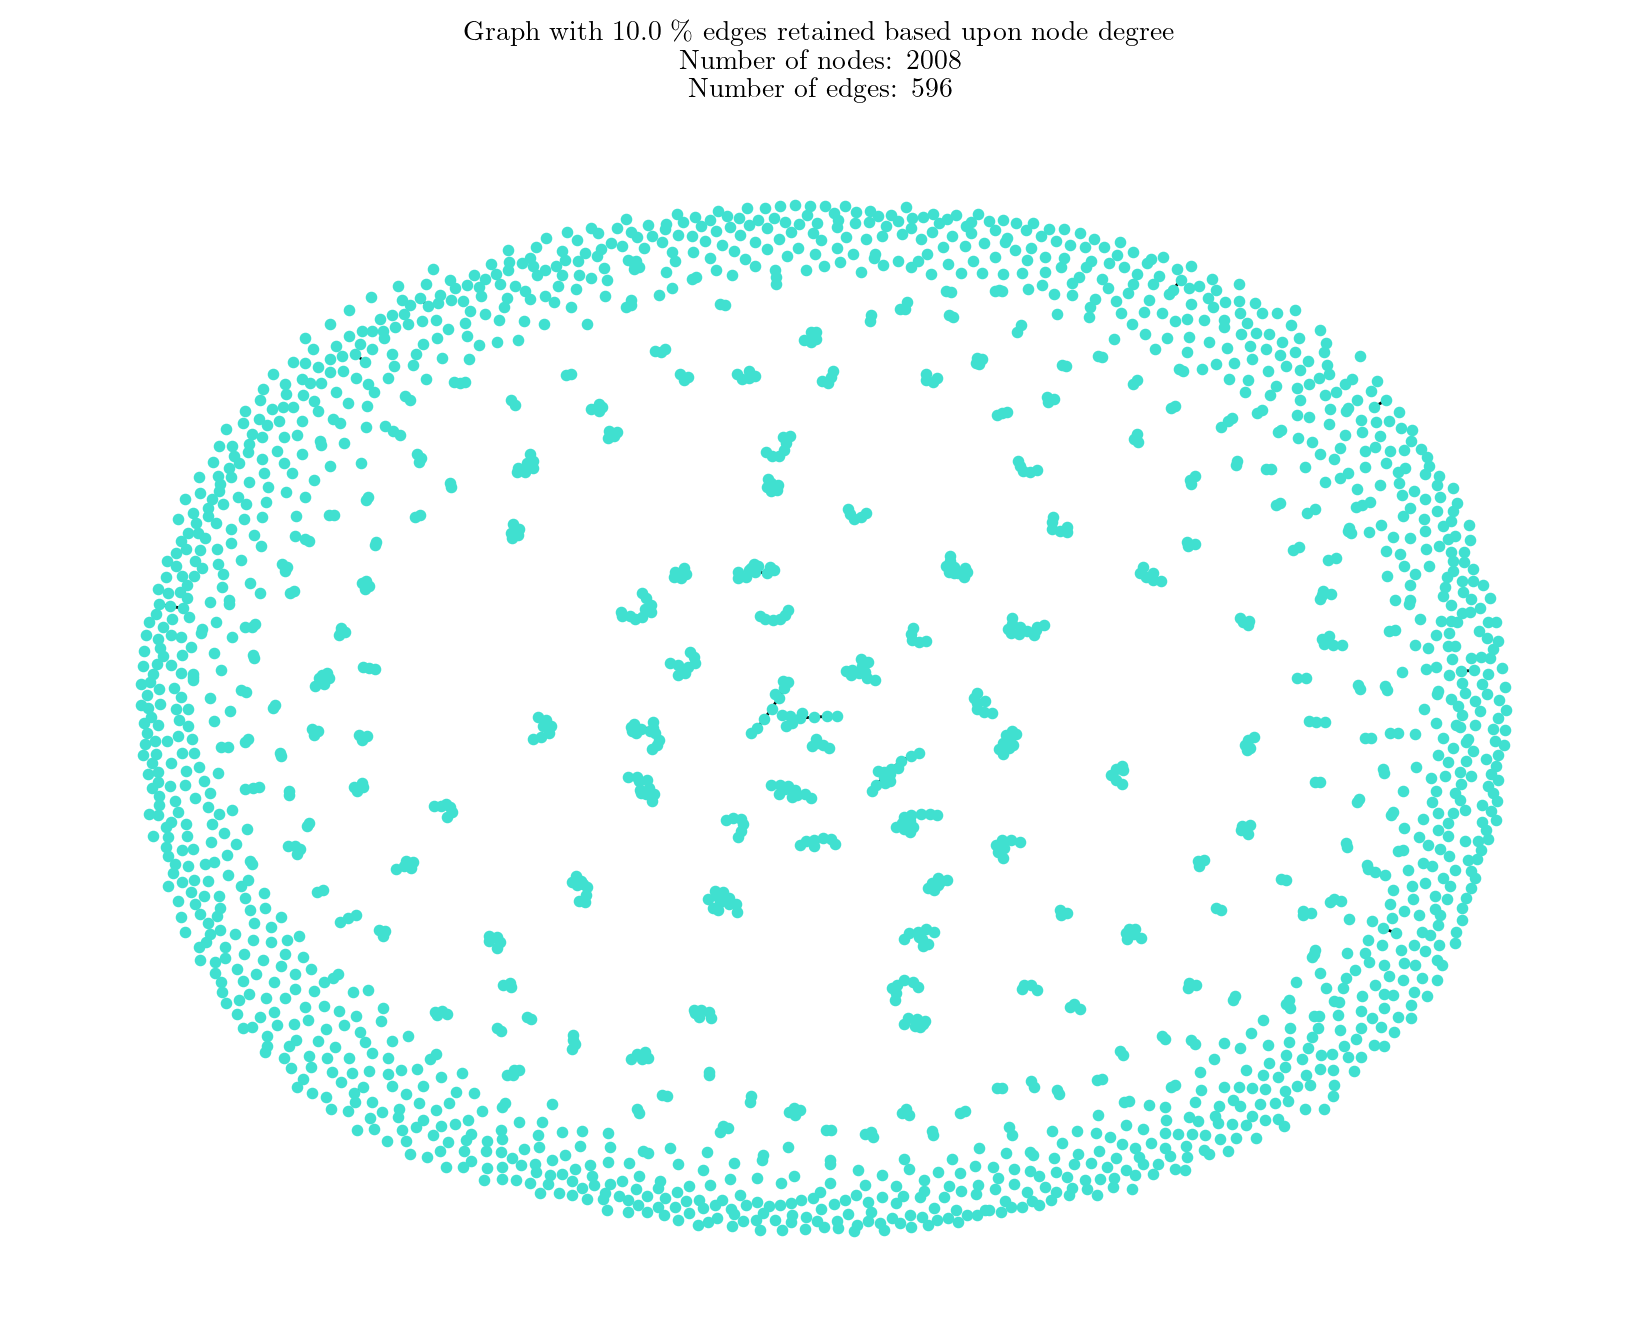

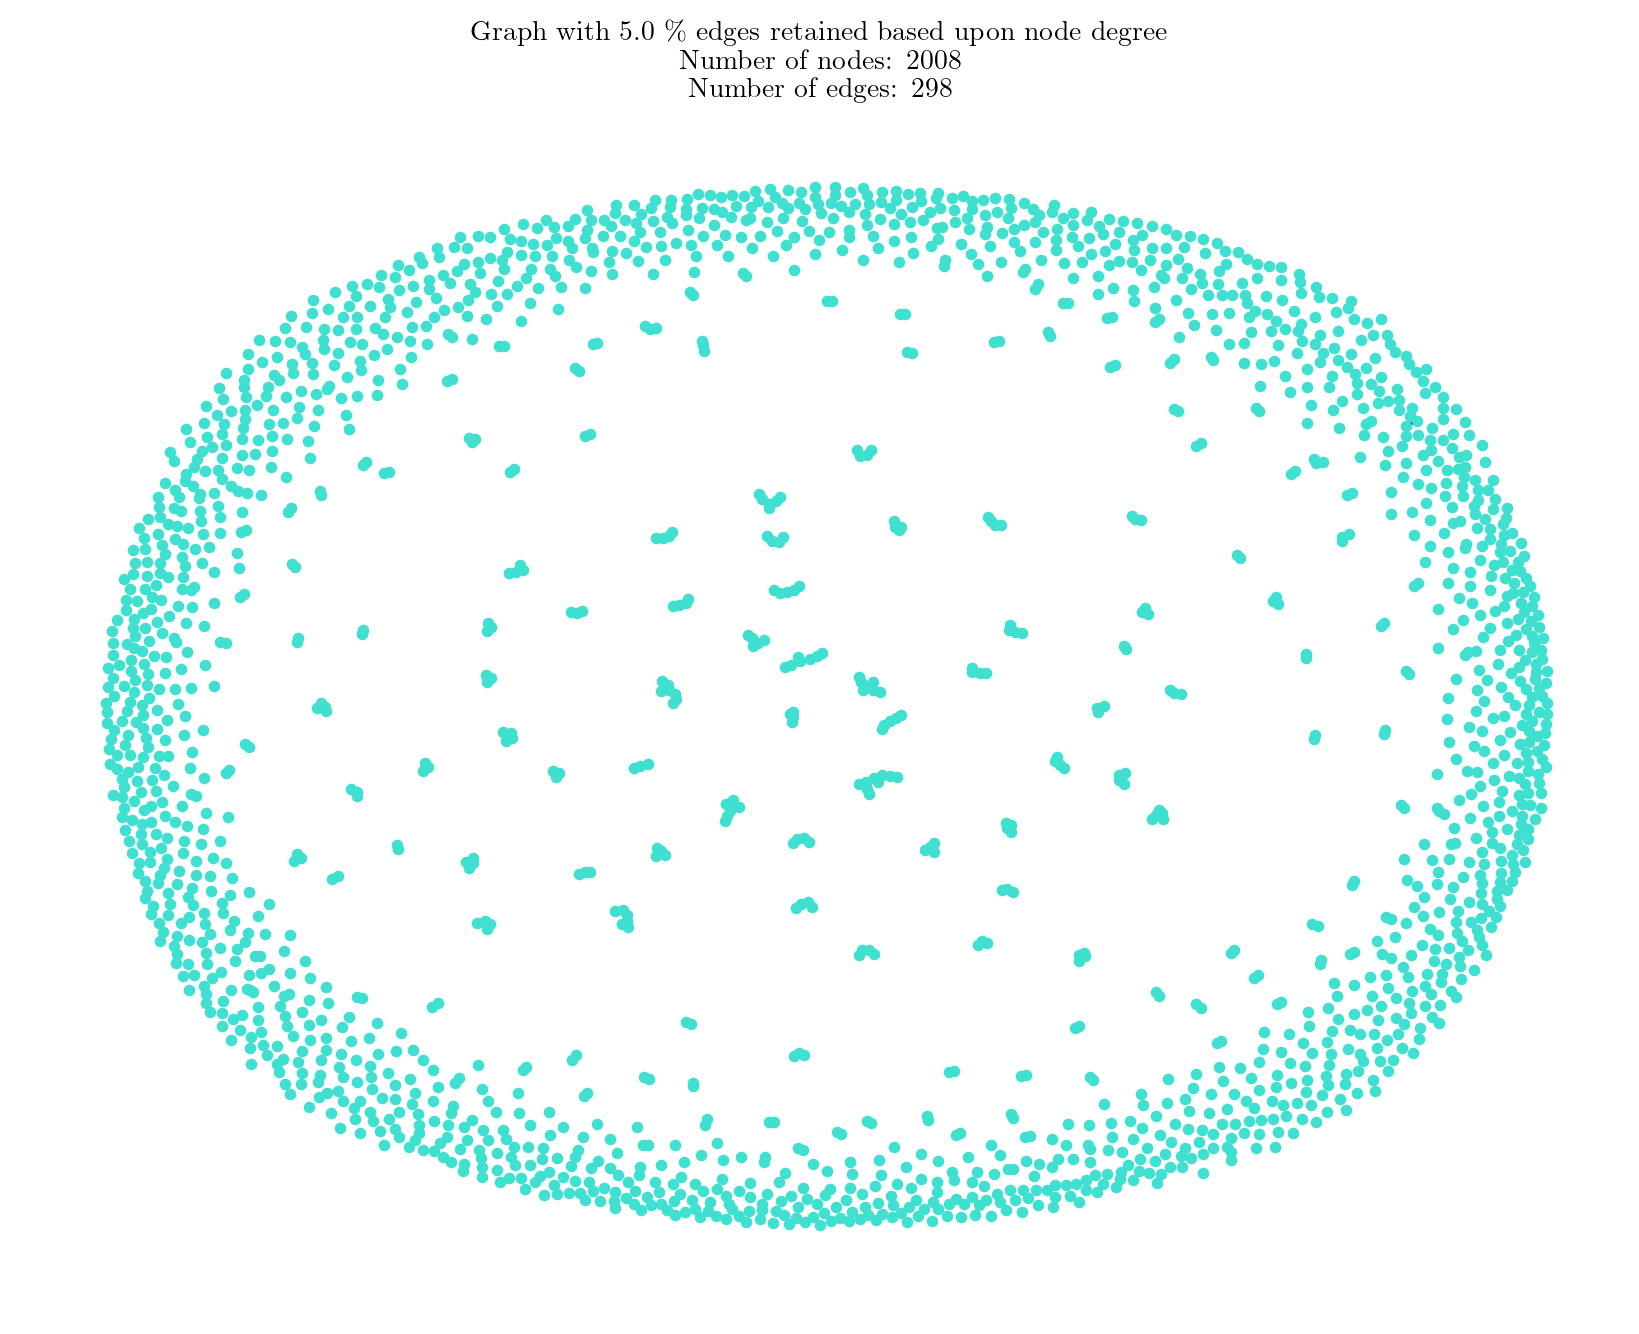

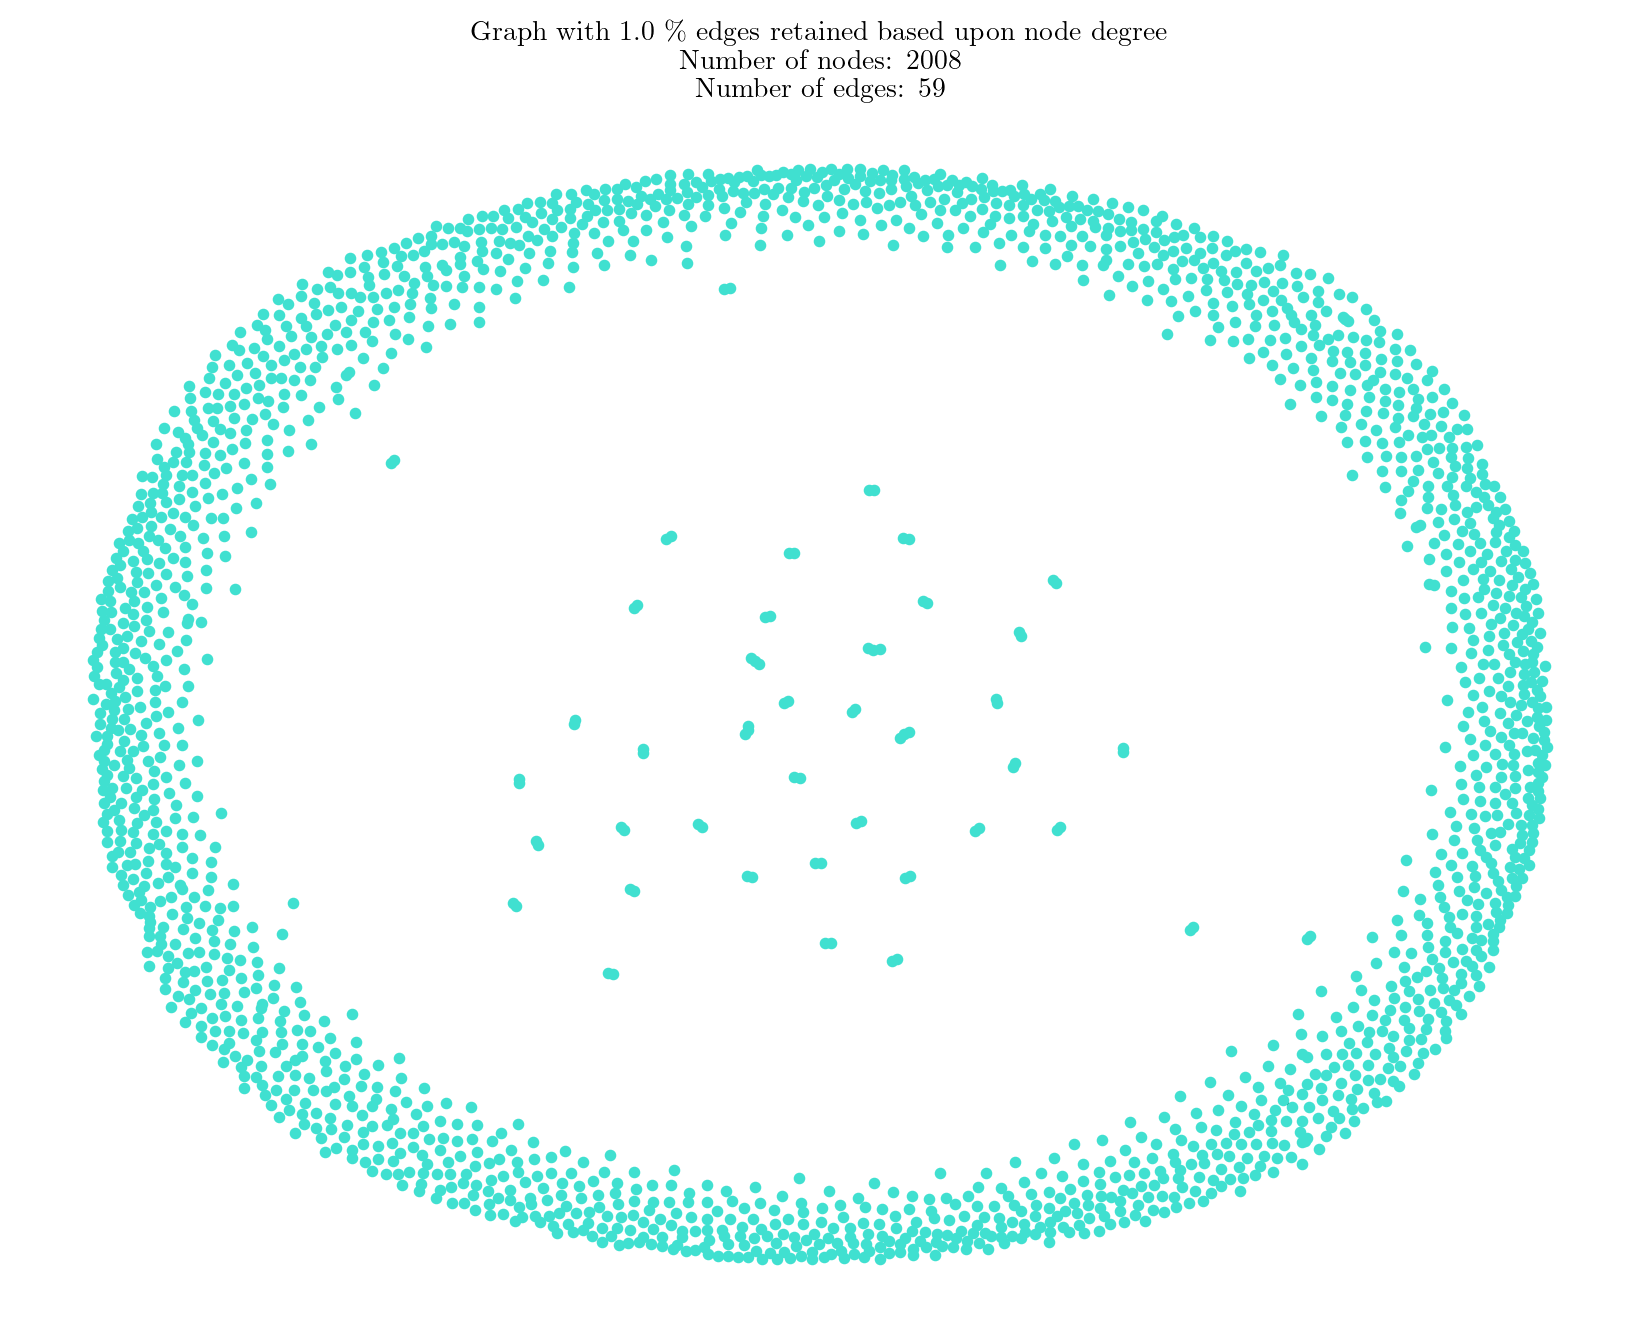

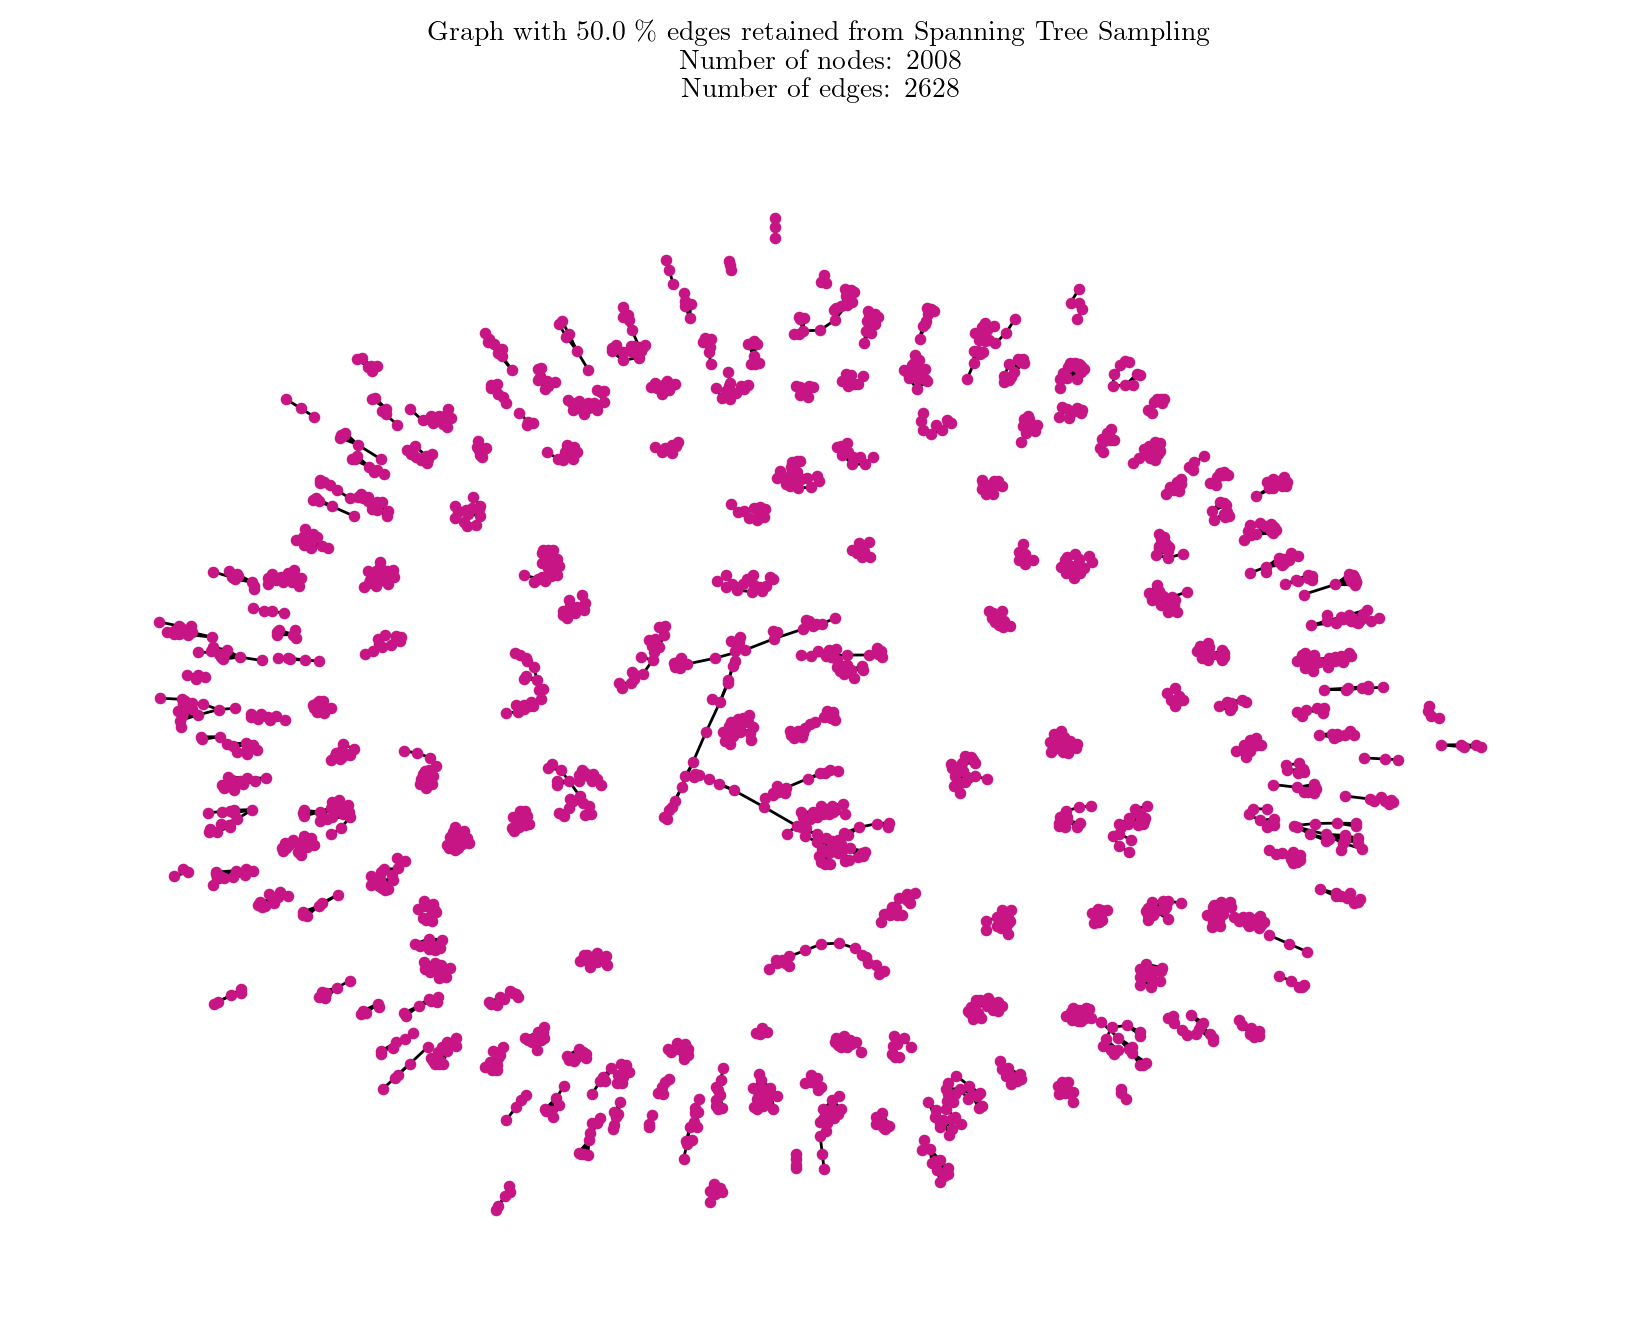

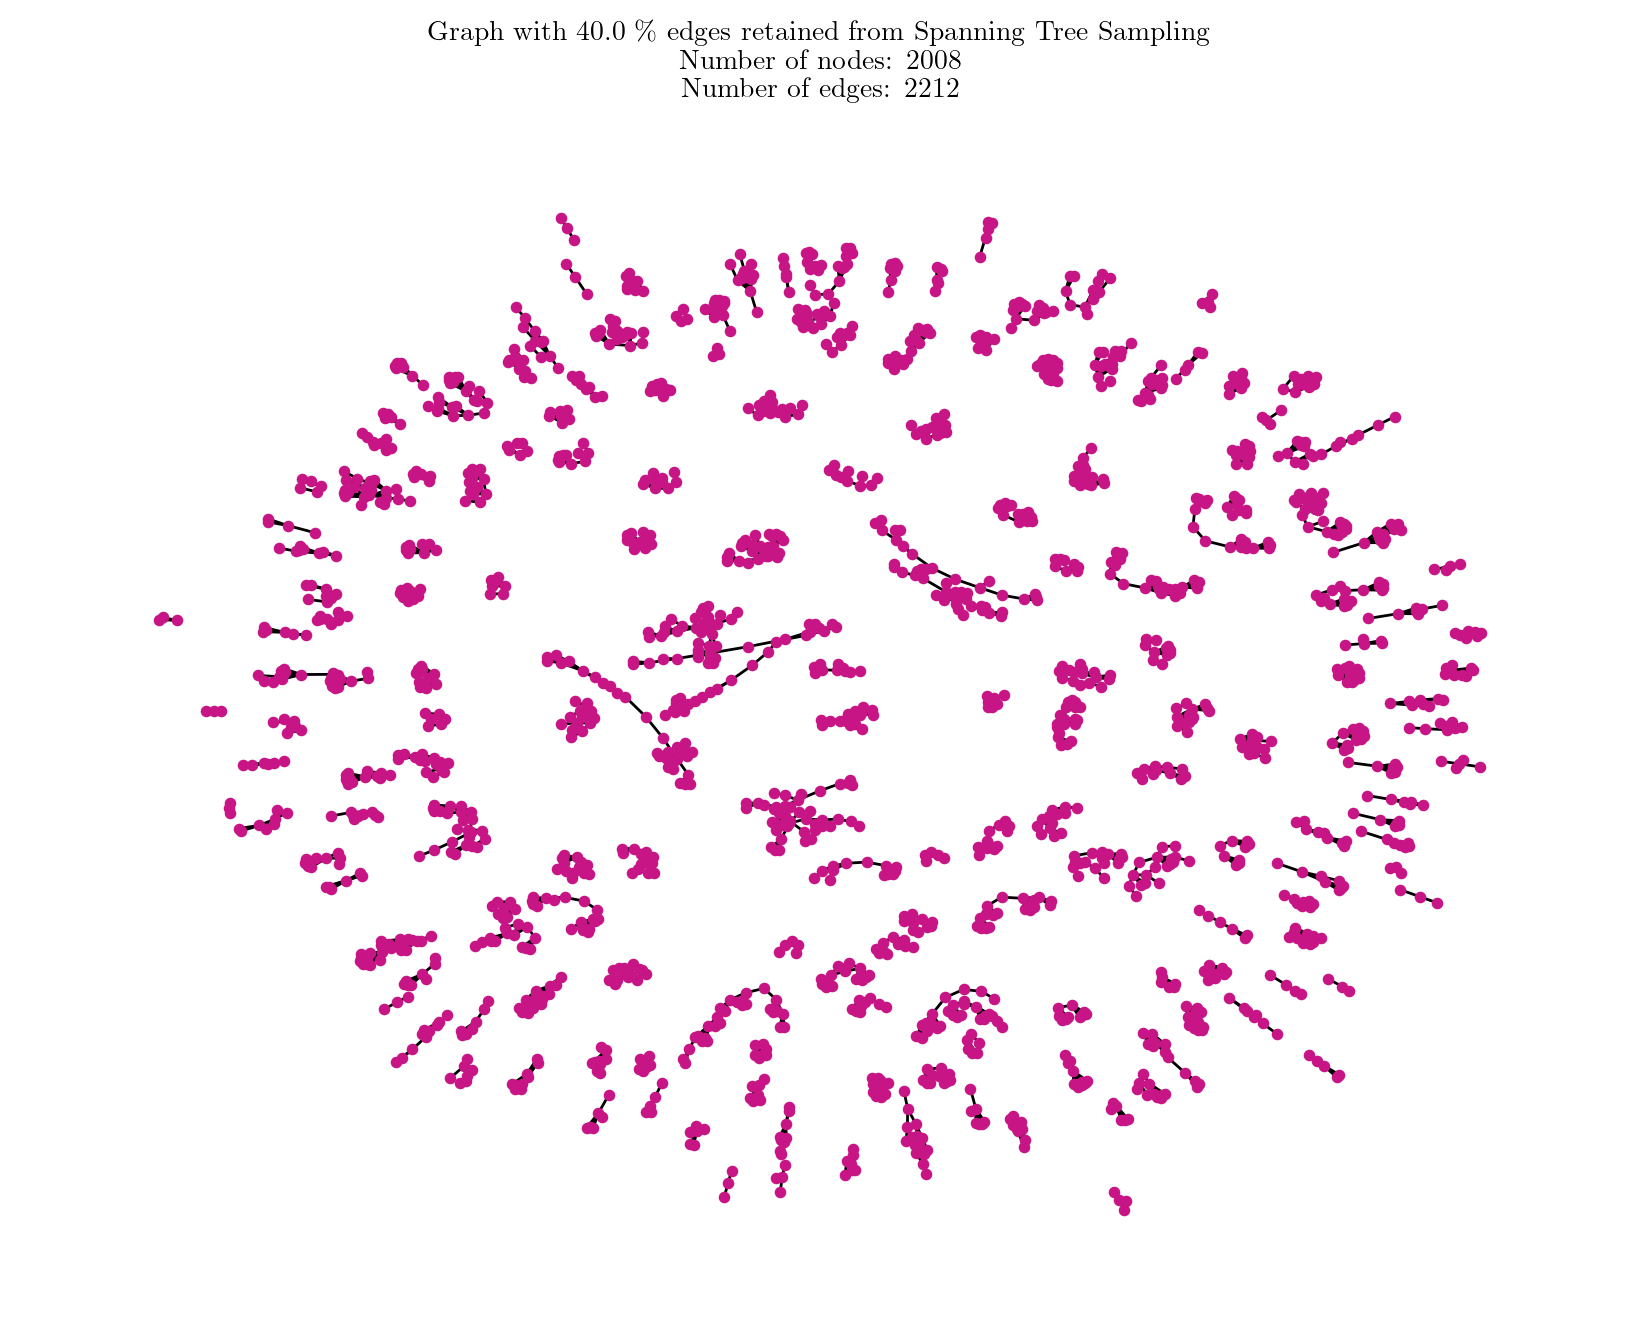

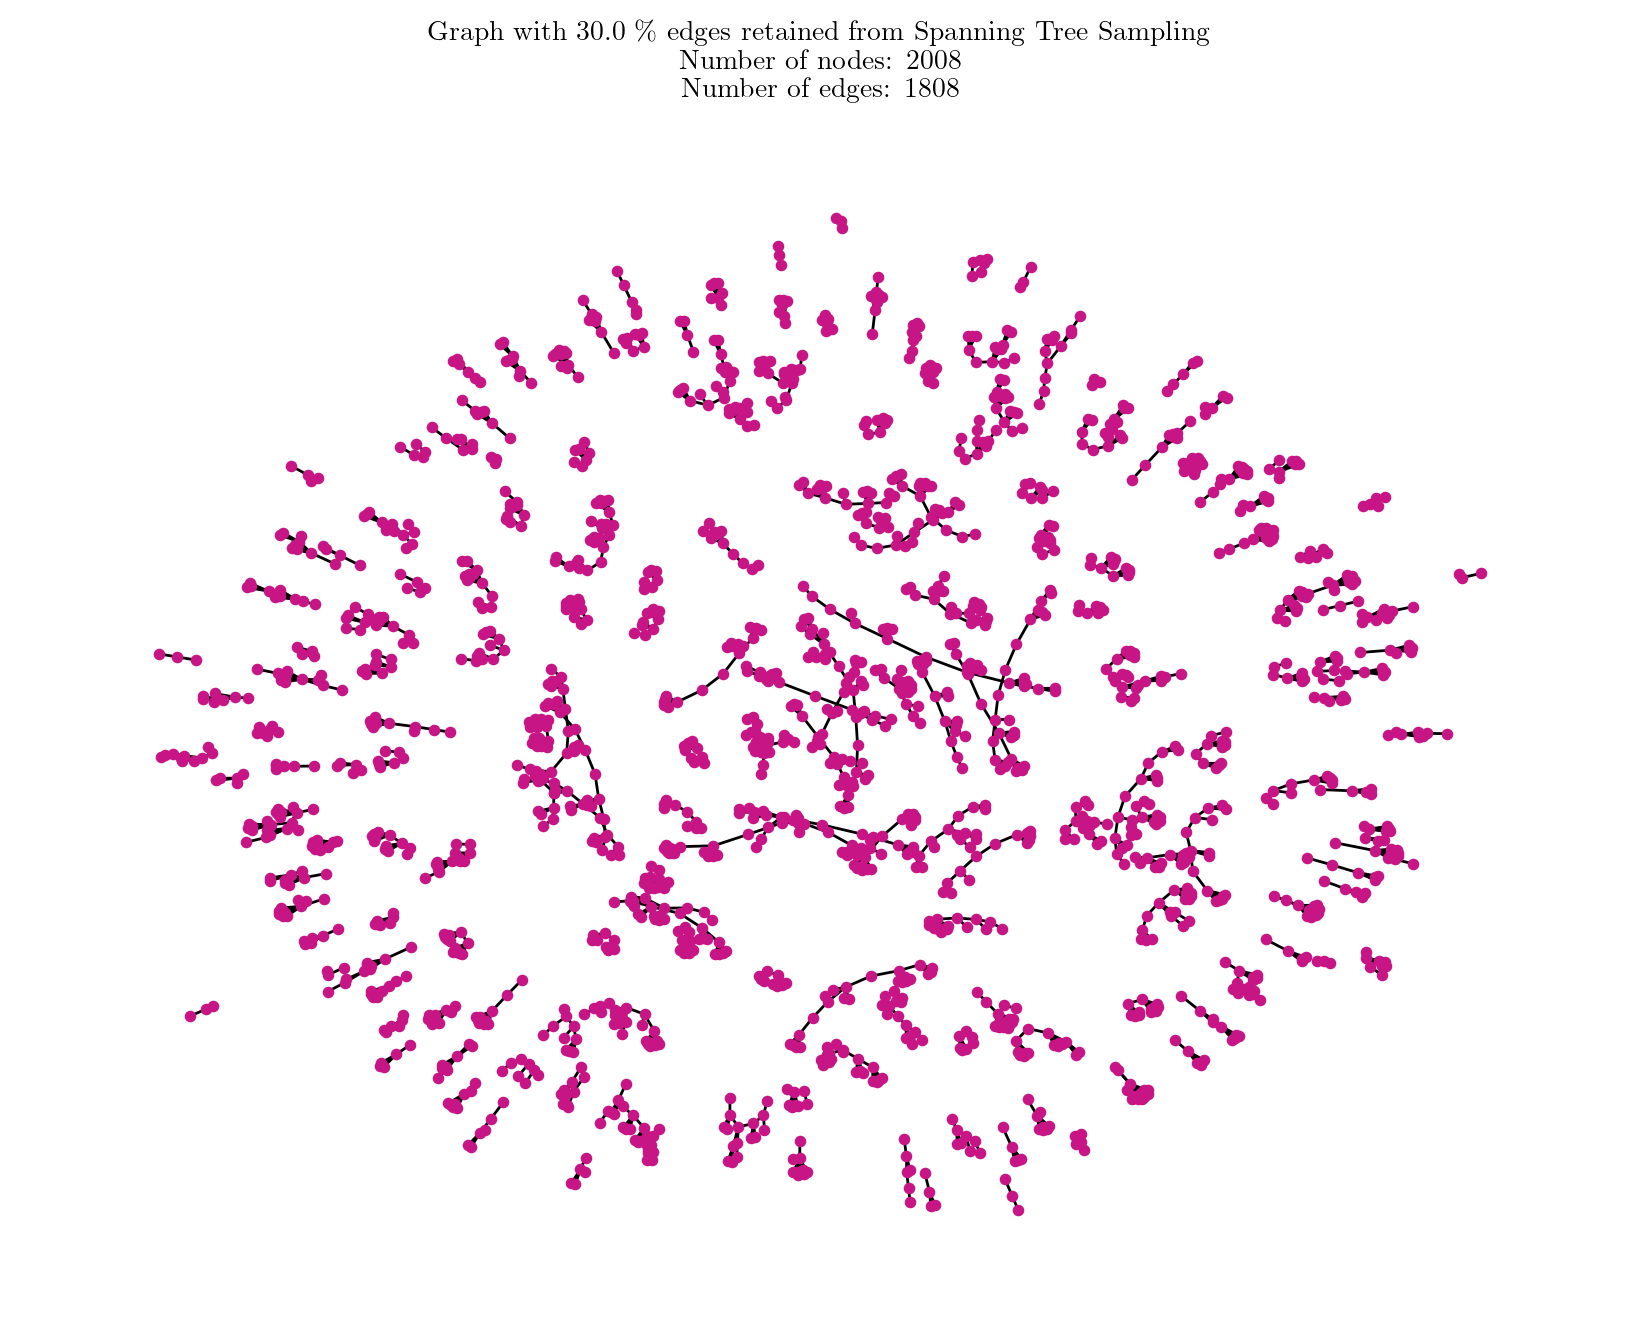

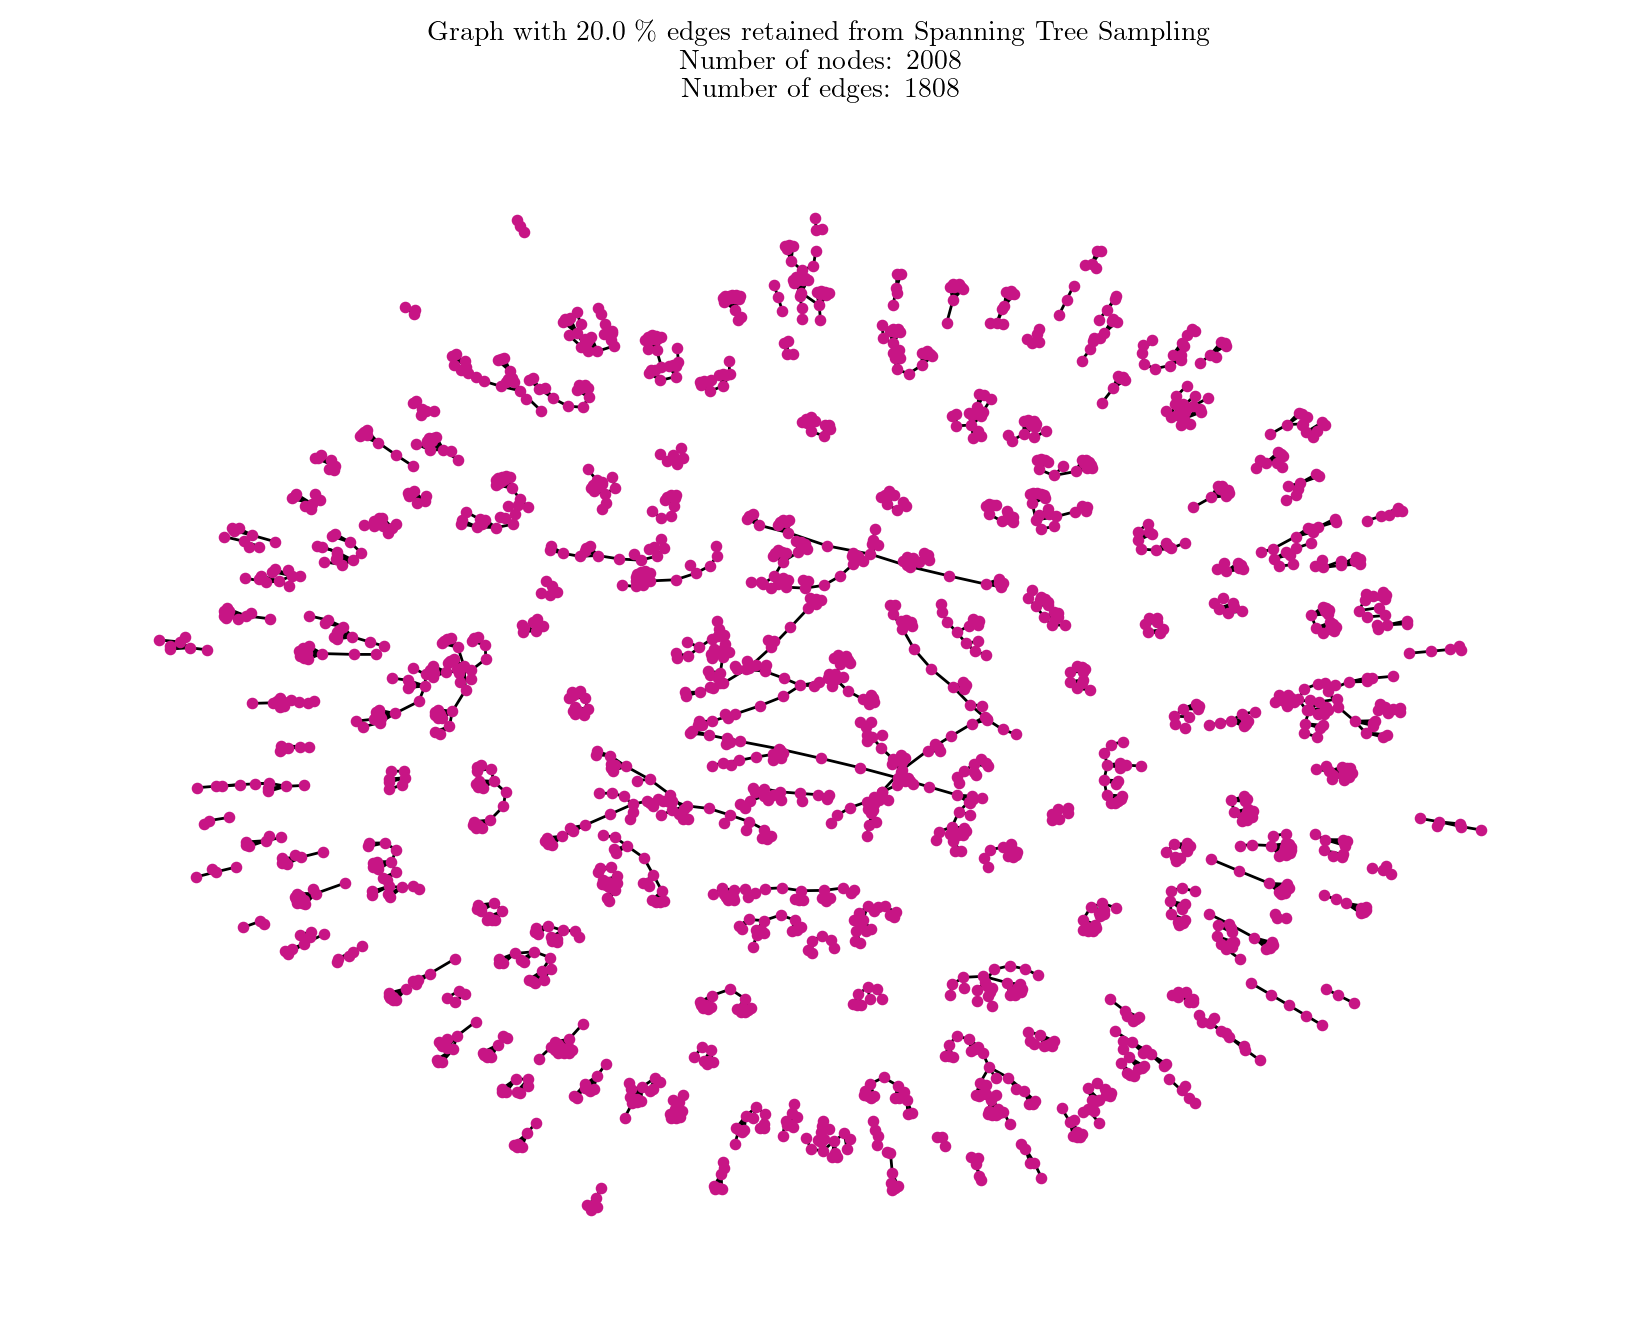

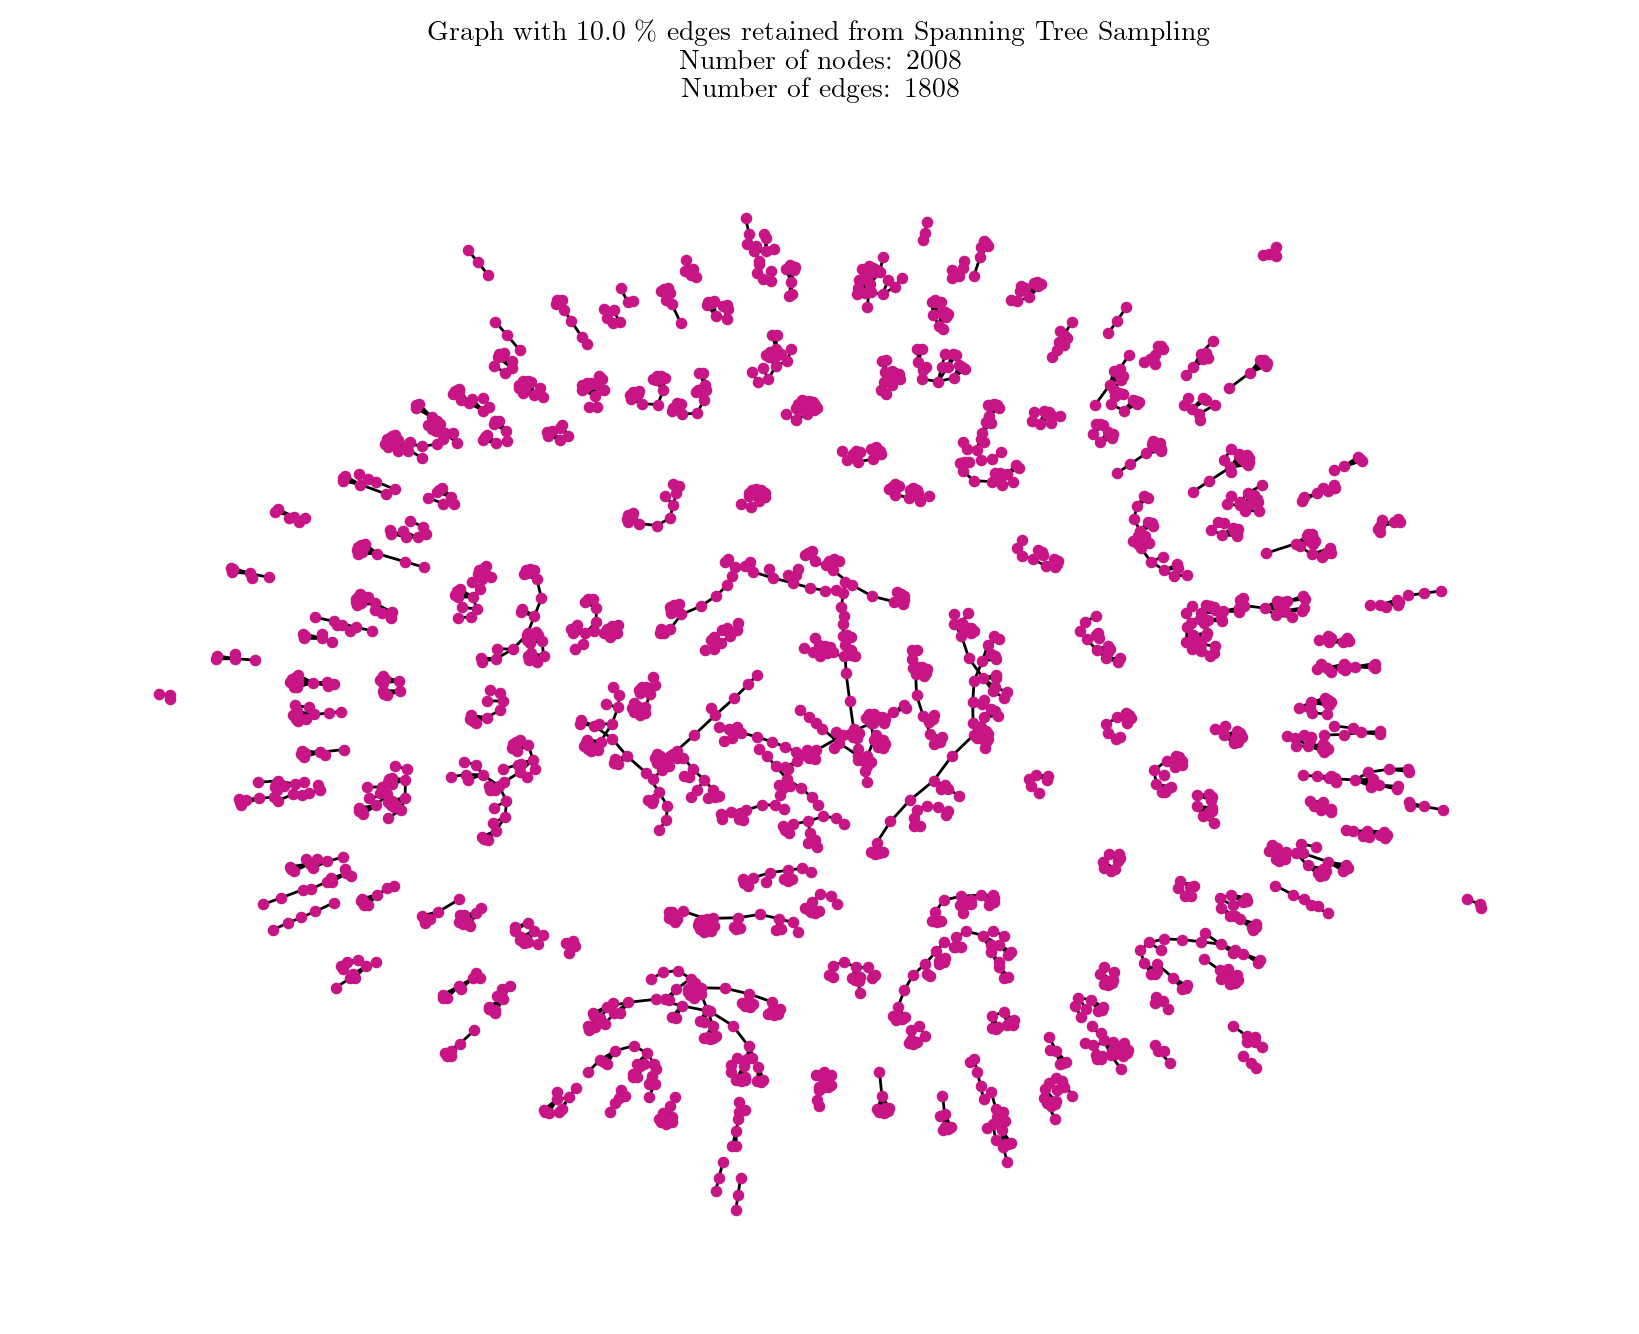

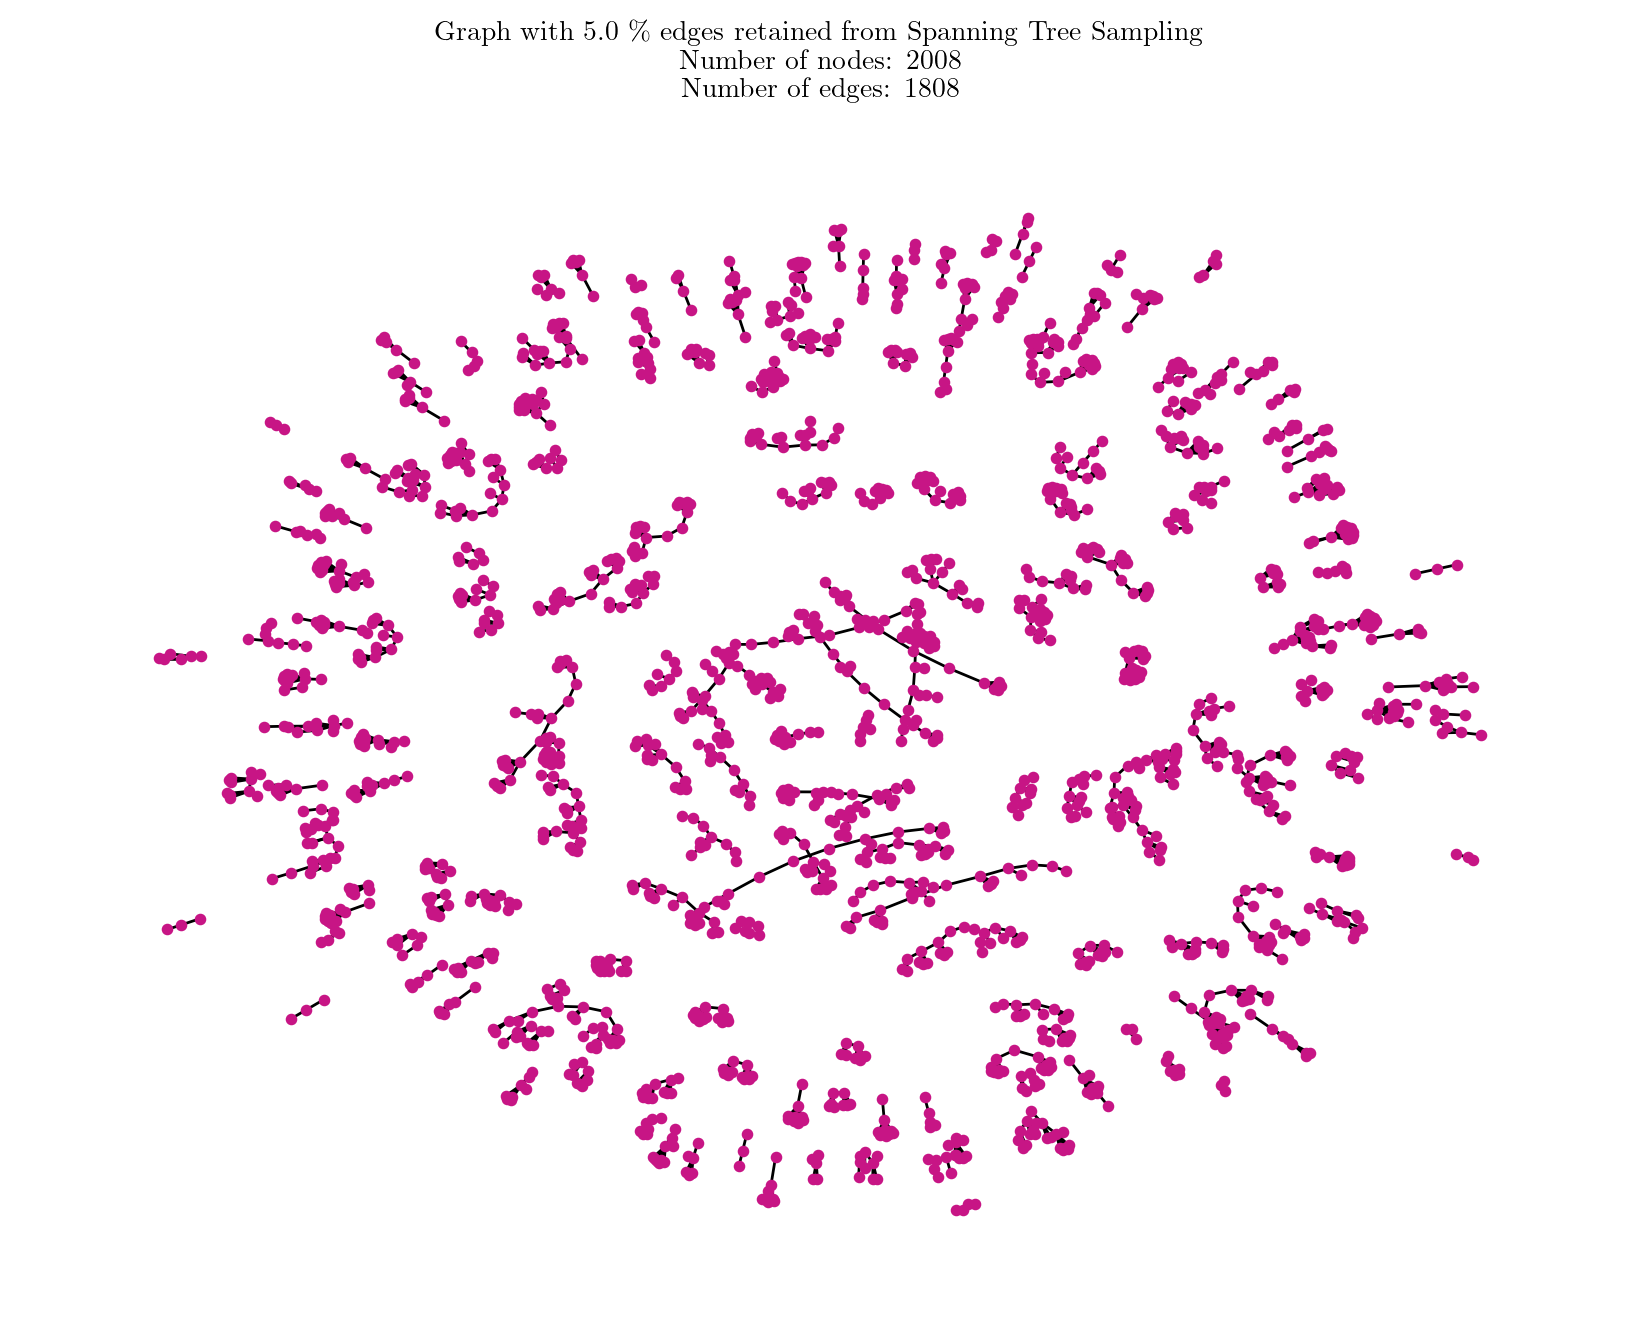

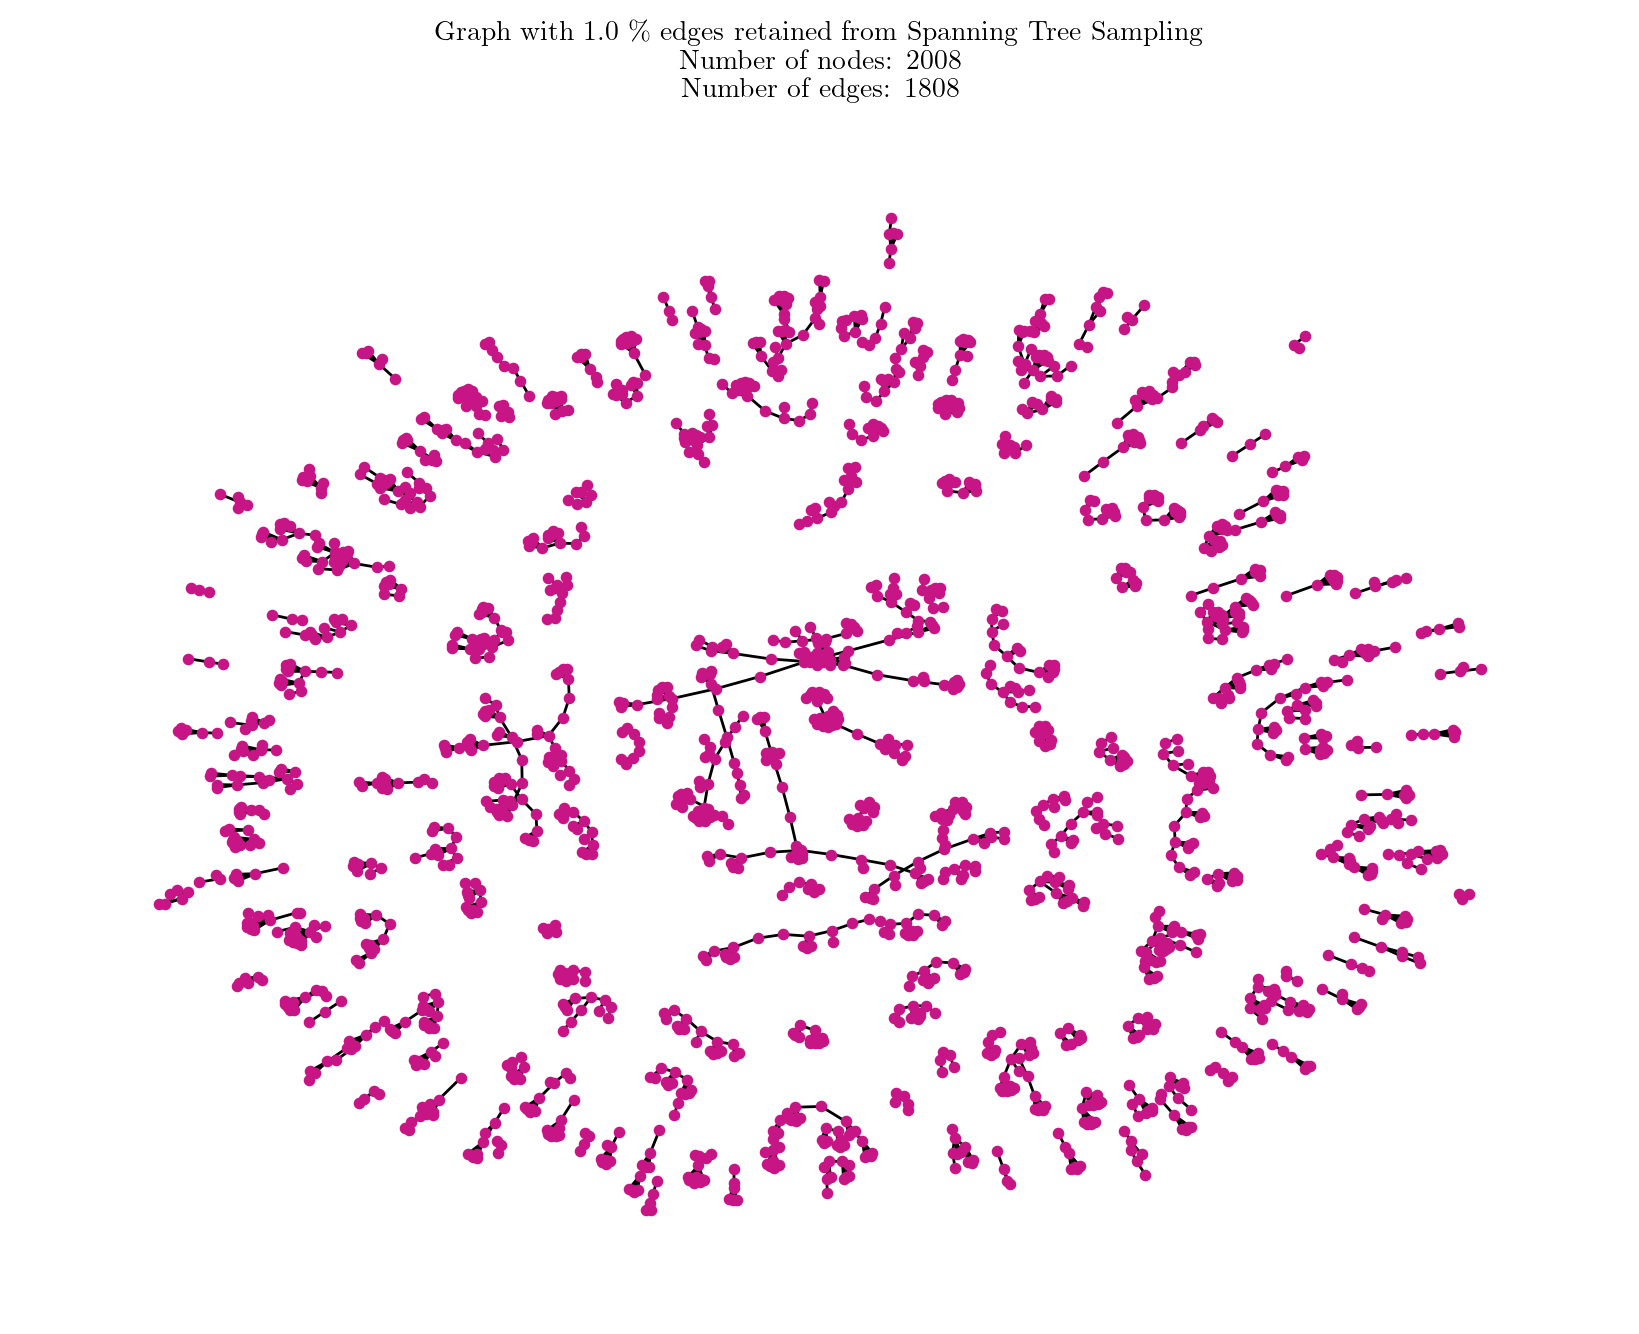

In [9]:
for idx, graph in enumerate(sparseAmzGraphs[4]):
    plt.figure(figsize = (8, 6))
    nx.draw(graph, with_labels = False, node_size = 10, node_color = "turquoise", edge_color = "black", pos = nx.spring_layout(graph, scale = 4))
    plt.title(fr"Graph with {100 * k_values[idx]} \%  edges retained based upon node degree" "\n" f"Number of nodes: {graph.number_of_nodes()}" "\n""Number of edges: " f"{graph.number_of_edges()}")
    plt.show()
    
for idx, graph in enumerate(sparseAmzGraphs[5]):
    plt.figure(figsize = (8, 6))
    nx.draw(graph, with_labels = False, node_size = 10, node_color = "mediumvioletred", edge_color = "black", pos = nx.spring_layout(graph, scale = 4))
    st = str(k_values[idx])
    plt.title(fr"Graph with {100 * k_values[idx]} \% edges retained from Spanning Tree Sampling" "\n" f"Number of nodes: {graph.number_of_nodes()}" "\n" "Number of edges: " f"{graph.number_of_edges()}")
    plt.show()

In [10]:
sp_tree = nx.minimum_spanning_tree(G_ind_Amz)

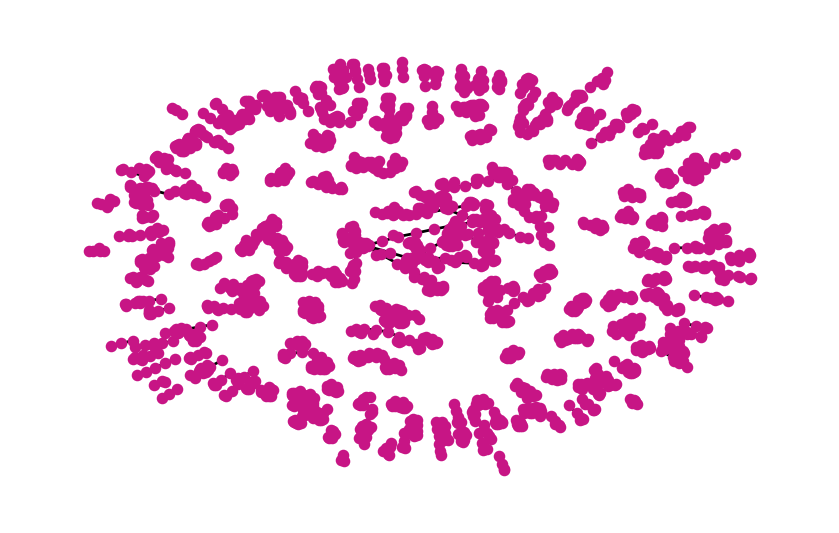

In [15]:
plt.figure(pl)
nx.draw(sp_tree, with_labels = False, node_size = 10, node_color = "mediumvioletred", edge_color = "black", pos = nx.spring_layout(sp_tree, scale = 4))

In [13]:
nx.draw()

5960